## Prostate methylation panel - 5/2022

In [17]:
library(tidyverse)
library(stringr)
library(openxlsx)

# make a file that can be used to annotate literature regions

In [46]:
# HG38
# gencode gene annotations: https://www.gencodegenes.org/human/
# load gene exon annotations

# df_gencode = read.csv(file="../Translational_Science/gencode.v40.annotation.tsv", sep="\t", header=FALSE) #HG38 file
# colnames(df_gencode) = c("chr","database","type","start","end","dot1","strand","dot2","annotation")
# head(df_gencode, 10)

In [24]:
# hg19/GR37 gencode file
df_gencode_hg19 = read.table(file="../Translational_Science/gencode.v40lift37.annotation_hg19..gff3", sep="\t", header=FALSE)
colnames(df_gencode_hg19) = c("chr","database","type","start","end","dot1","strand","dot2","annotation")
head(df_gencode_hg19)

,chr,database,type,start,end,dot1,strand,dot2,annotation
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,chr1,HAVANA,gene,11869,14409,.,+,.,ID=ENSG00000223972.5;gene_id=ENSG00000223972.5_5;gene_type=transcribed_unprocessed_pseudogene;gene_name=DDX11L1;level=2;hgnc_id=HGNC:37102;havana_gene=OTTHUMG00000000961.2_5;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap
2,chr1,HAVANA,transcript,11869,14409,.,+,.,ID=ENST00000456328.2;Parent=ENSG00000223972.5;gene_id=ENSG00000223972.5_5;transcript_id=ENST00000456328.2_1;gene_type=transcribed_unprocessed_pseudogene;gene_name=DDX11L1;transcript_type=processed_transcript;transcript_name=DDX11L1-202;level=2;transcript_support_level=1;hgnc_id=HGNC:37102;tag=basic;havana_gene=OTTHUMG00000000961.2_5;havana_transcript=OTTHUMT00000362751.1_1;remap_num_mappings=1;remap_status=full_contig;remap_target_status=overlap
3,chr1,HAVANA,exon,11869,12227,.,+,.,ID=exon:ENST00000456328.2:1;Parent=ENST00000456328.2;gene_id=ENSG00000223972.5_5;transcript_id=ENST00000456328.2_1;gene_type=transcribed_unprocessed_pseudogene;gene_name=DDX11L1;transcript_type=processed_transcript;transcript_name=DDX11L1-202;exon_number=1;exon_id=ENSE00002234944.1_1;level=2;transcript_support_level=1;hgnc_id=HGNC:37102;tag=basic;havana_gene=OTTHUMG00000000961.2_5;havana_transcript=OTTHUMT00000362751.1_1;remap_original_location=chr1:+:11869-12227;remap_status=full_contig
4,chr1,HAVANA,exon,12613,12721,.,+,.,ID=exon:ENST00000456328.2:2;Parent=ENST00000456328.2;gene_id=ENSG00000223972.5_5;transcript_id=ENST00000456328.2_1;gene_type=transcribed_unprocessed_pseudogene;gene_name=DDX11L1;transcript_type=processed_transcript;transcript_name=DDX11L1-202;exon_number=2;exon_id=ENSE00003582793.1_1;level=2;transcript_support_level=1;hgnc_id=HGNC:37102;tag=basic;havana_gene=OTTHUMG00000000961.2_5;havana_transcript=OTTHUMT00000362751.1_1;remap_original_location=chr1:+:12613-12721;remap_status=full_contig
5,chr1,HAVANA,exon,13221,14409,.,+,.,ID=exon:ENST00000456328.2:3;Parent=ENST00000456328.2;gene_id=ENSG00000223972.5_5;transcript_id=ENST00000456328.2_1;gene_type=transcribed_unprocessed_pseudogene;gene_name=DDX11L1;transcript_type=processed_transcript;transcript_name=DDX11L1-202;exon_number=3;exon_id=ENSE00002312635.1_1;level=2;transcript_support_level=1;hgnc_id=HGNC:37102;tag=basic;havana_gene=OTTHUMG00000000961.2_5;havana_transcript=OTTHUMT00000362751.1_1;remap_original_location=chr1:+:13221-14409;remap_status=full_contig
6,chr1,HAVANA,transcript,12010,13670,.,+,.,"ID=ENST00000450305.2;Parent=ENSG00000223972.5;gene_id=ENSG00000223972.5_5;transcript_id=ENST00000450305.2_2;gene_type=transcribed_unprocessed_pseudogene;gene_name=DDX11L1;transcript_type=transcribed_unprocessed_pseudogene;transcript_name=DDX11L1-201;level=2;transcript_support_level=NA;hgnc_id=HGNC:37102;ont=PGO:0000005,PGO:0000019;tag=basic,Ensembl_canonical;havana_gene=OTTHUMG00000000961.2_5;havana_transcript=OTTHUMT00000002844.2_2;remap_num_mappings=1;remap_status=full_contig;remap_target_status=overlap"


In [218]:
df_gencode_hg19_genes = df_gencode_hg19[df_gencode_hg19$type=="gene",]
df_gencode_hg19_genes$tmp = sapply(strsplit(df_gencode_hg19_genes$annotation, "gene_name="), "[", 2)
df_gencode_hg19_genes$gene_name = sapply(strsplit(df_gencode_hg19_genes$tmp, ";"), "[", 1)

df_gencode_hg19_genes$chr <- sapply(strsplit(df_gencode_hg19_genes$chr, "chr"), "[", 2)
head(df_gencode_hg19_genes)

,chr,database,type,start,end,dot1,strand,dot2,annotation,tmp,gene_name
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,HAVANA,gene,11869,14409,.,+,.,ID=ENSG00000223972.5;gene_id=ENSG00000223972.5_5;gene_type=transcribed_unprocessed_pseudogene;gene_name=DDX11L1;level=2;hgnc_id=HGNC:37102;havana_gene=OTTHUMG00000000961.2_5;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,DDX11L1;level=2;hgnc_id=HGNC:37102;havana_gene=OTTHUMG00000000961.2_5;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,DDX11L1
13,1,HAVANA,gene,14404,29570,.,-,.,ID=ENSG00000227232.5;gene_id=ENSG00000227232.5_5;gene_type=unprocessed_pseudogene;gene_name=WASH7P;level=2;hgnc_id=HGNC:38034;havana_gene=OTTHUMG00000000958.1_5;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,WASH7P;level=2;hgnc_id=HGNC:38034;havana_gene=OTTHUMG00000000958.1_5;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,WASH7P
26,1,HAVANA,gene,29554,31109,.,+,.,ID=ENSG00000243485.5;gene_id=ENSG00000243485.5_11;gene_type=lncRNA;gene_name=MIR1302-2HG;level=2;hgnc_id=HGNC:52482;tag=ncRNA_host;havana_gene=OTTHUMG00000000959.2_11;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,MIR1302-2HG;level=2;hgnc_id=HGNC:52482;tag=ncRNA_host;havana_gene=OTTHUMG00000000959.2_11;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,MIR1302-2HG
34,1,HAVANA,gene,34554,36081,.,-,.,ID=ENSG00000237613.2;gene_id=ENSG00000237613.2_6;gene_type=lncRNA;gene_name=FAM138A;level=2;hgnc_id=HGNC:32334;havana_gene=OTTHUMG00000000960.1_6;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,FAM138A;level=2;hgnc_id=HGNC:32334;havana_gene=OTTHUMG00000000960.1_6;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,FAM138A
42,1,HAVANA,gene,52473,53312,.,+,.,ID=ENSG00000268020.3;gene_id=ENSG00000268020.3_5;gene_type=unprocessed_pseudogene;gene_name=OR4G4P;level=2;hgnc_id=HGNC:14822;havana_gene=OTTHUMG00000185779.1_5;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,OR4G4P;level=2;hgnc_id=HGNC:14822;havana_gene=OTTHUMG00000185779.1_5;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,OR4G4P
45,1,HAVANA,gene,57598,64116,.,+,.,ID=ENSG00000240361.2;gene_id=ENSG00000240361.2_6;gene_type=transcribed_unprocessed_pseudogene;gene_name=OR4G11P;level=2;hgnc_id=HGNC:31276;havana_gene=OTTHUMG00000001095.3_6;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,OR4G11P;level=2;hgnc_id=HGNC:31276;havana_gene=OTTHUMG00000001095.3_6;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,OR4G11P


In [219]:
df_gencode_hg19_genes$end <- as.integer(format(df_gencode_hg19_genes$end, scientific=FALSE))
df_gencode_hg19_genes$start <- as.integer(format(df_gencode_hg19_genes$start, scientific=FALSE))
df_gencode_hg19_genes = df_gencode_hg19_genes[order(df_gencode_hg19_genes$chr, df_gencode_hg19_genes$start,df_gencode_hg19_genes$end),]

df_gencode_hg19_genes = df_gencode_hg19_genes[df_gencode_hg19_genes!="M",]
df_gencode_hg19_genes = df_gencode_hg19_genes[complete.cases(df_gencode_hg19_genes),]
head(df_gencode_hg19_genes)

,chr,database,type,start,end,dot1,strand,dot2,annotation,tmp,gene_name
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,HAVANA,gene,11869,14409,.,+,.,ID=ENSG00000223972.5;gene_id=ENSG00000223972.5_5;gene_type=transcribed_unprocessed_pseudogene;gene_name=DDX11L1;level=2;hgnc_id=HGNC:37102;havana_gene=OTTHUMG00000000961.2_5;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,DDX11L1;level=2;hgnc_id=HGNC:37102;havana_gene=OTTHUMG00000000961.2_5;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,DDX11L1
13,1,HAVANA,gene,14404,29570,.,-,.,ID=ENSG00000227232.5;gene_id=ENSG00000227232.5_5;gene_type=unprocessed_pseudogene;gene_name=WASH7P;level=2;hgnc_id=HGNC:38034;havana_gene=OTTHUMG00000000958.1_5;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,WASH7P;level=2;hgnc_id=HGNC:38034;havana_gene=OTTHUMG00000000958.1_5;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,WASH7P
26,1,HAVANA,gene,29554,31109,.,+,.,ID=ENSG00000243485.5;gene_id=ENSG00000243485.5_11;gene_type=lncRNA;gene_name=MIR1302-2HG;level=2;hgnc_id=HGNC:52482;tag=ncRNA_host;havana_gene=OTTHUMG00000000959.2_11;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,MIR1302-2HG;level=2;hgnc_id=HGNC:52482;tag=ncRNA_host;havana_gene=OTTHUMG00000000959.2_11;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,MIR1302-2HG
34,1,HAVANA,gene,34554,36081,.,-,.,ID=ENSG00000237613.2;gene_id=ENSG00000237613.2_6;gene_type=lncRNA;gene_name=FAM138A;level=2;hgnc_id=HGNC:32334;havana_gene=OTTHUMG00000000960.1_6;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,FAM138A;level=2;hgnc_id=HGNC:32334;havana_gene=OTTHUMG00000000960.1_6;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,FAM138A
42,1,HAVANA,gene,52473,53312,.,+,.,ID=ENSG00000268020.3;gene_id=ENSG00000268020.3_5;gene_type=unprocessed_pseudogene;gene_name=OR4G4P;level=2;hgnc_id=HGNC:14822;havana_gene=OTTHUMG00000185779.1_5;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,OR4G4P;level=2;hgnc_id=HGNC:14822;havana_gene=OTTHUMG00000185779.1_5;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,OR4G4P
45,1,HAVANA,gene,57598,64116,.,+,.,ID=ENSG00000240361.2;gene_id=ENSG00000240361.2_6;gene_type=transcribed_unprocessed_pseudogene;gene_name=OR4G11P;level=2;hgnc_id=HGNC:31276;havana_gene=OTTHUMG00000001095.3_6;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,OR4G11P;level=2;hgnc_id=HGNC:31276;havana_gene=OTTHUMG00000001095.3_6;remap_status=full_contig;remap_num_mappings=1;remap_target_status=overlap,OR4G11P


In [220]:
return_promoter_start <- function(bed_row){
    if (!(bed_row[7] %in% c("+","-"))){
        print(bed_row[7])
        stop()}
    if (bed_row[7]=="+"){
        return(as.numeric(bed_row[4])-1000)
    }else if(bed_row[7]=="-"){
        return(bed_row[5])
    }}
return_promoter_end <- function(bed_row){
    if (!(bed_row[7] %in% c("+","-"))){
        print(bed_row[7])
        stop()}
    if (bed_row[7]=="+"){
        return(bed_row[4])
    }else if(bed_row[7]=="-"){
        return(as.numeric(bed_row[5])+1000)
    }}

In [223]:
df_promoters_hg19 = df_gencode_hg19_genes 
df_promoters_hg19$start = as.numeric(apply(df_gencode_hg19_genes, 1, return_promoter_start))
df_promoters_hg19$end = as.numeric(apply(df_gencode_hg19_genes, 1, return_promoter_end))

df_promoters_hg19 = df_promoters_hg19 %>% mutate(type="promoter", score=0) %>%
    select(chr, start, end, gene_name, score, strand, dot2, type)
head(df_promoters_hg19)

,chr,start,end,gene_name,score,strand,dot2,type
,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1,10869,11869,DDX11L1,0,+,.,promoter
13,1,29570,30570,WASH7P,0,-,.,promoter
26,1,28554,29554,MIR1302-2HG,0,+,.,promoter
34,1,36081,37081,FAM138A,0,-,.,promoter
42,1,51473,52473,OR4G4P,0,+,.,promoter
45,1,56598,57598,OR4G11P,0,+,.,promoter


In [254]:
# df_promoters_hg19 = apply(df_promoters_hg19, 2, as.character)
# df_promoters_hg19$start <- as.numeric(df_promoters_hg19$start)
# df_promoters_hg19$end <- as.numeric(df_promoters_hg19$end)

cols = c('chr','start','end','gene_name','score','strand','type')
write.table(df_promoters_hg19[,cols], file="../Translational_Science/gencode.v40lift37.promoters_hg19.bed",
           row.names=FALSE, sep="\t", quote=FALSE, col.names=FALSE)

In [40]:
expand_start <- function(bed_row){
    if (!(bed_row[7] %in% c("+","-"))){
        print(bed_row[7])
        stop()}
    if (bed_row[7]=="+"){
        return(as.numeric(bed_row[4])-1000)
    }else{
        return(bed_row[4])
    }}
expand_end <- function(bed_row){
    if (!(bed_row[7] %in% c("+","-"))){
        print(bed_row[7])
        stop()}
    if (bed_row[7]=="-"){
        return(as.numeric(bed_row[5])+1000)
    }else if(bed_row[7]=="+"){
        return(bed_row[5])
    }}

In [209]:
# full genes (body+prom)
df_full_genes_hg19 = df_gencode_hg19_genes
df_full_genes_hg19$start = apply(df_gencode_hg19_genes, 1, expand_start)
df_full_genes_hg19$end = apply(df_gencode_hg19_genes, 1, expand_end)

df_full_genes_hg19 = df_full_genes_hg19 %>% mutate(type="gene_plus_promoter", score=0, chr=paste0("chr",chr, sep="")) %>%
    select(chr, start, end, gene_name, score, strand, dot2, type)
head(df_full_genes_hg19)

,chr,start,end,gene_name,score,strand,dot2,type
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,chr1,10869,14409,DDX11L1,0,+,.,gene_plus_promoter
13,chr1,14404,30570,WASH7P,0,-,.,gene_plus_promoter
26,chr1,28554,31109,MIR1302-2HG,0,+,.,gene_plus_promoter
34,chr1,34554,37081,FAM138A,0,-,.,gene_plus_promoter
42,chr1,51473,53312,OR4G4P,0,+,.,gene_plus_promoter
45,chr1,56598,64116,OR4G11P,0,+,.,gene_plus_promoter


In [44]:
names(df_full_genes_hg19)

[1] "chr"       "start"     "end"       "gene_name" "strand"    "dot2"     
[7] "type"

In [322]:
cols = c('chr','start','end','gene_name','score','strand','type')
df_full_genes_hg19$start <- as.numeric(df_full_genes_hg19$start)
df_full_genes_hg19$end <- as.numeric(df_full_genes_hg19$end)
df_full_genes_hg19$chr <- gsub("chr","",df_full_genes_hg19$chr)

write.table(df_full_genes_hg19[,cols], file="../Translational_Science/gencode.v40lift37.full_genes_hg19.bed",
          quote=FALSE, row.names=FALSE,
          sep="\t", col.names=FALSE
         )
print("A")

# check bed file format by upload here: https://genome.ucsc.edu/cgi-bin/hgCustom

[1] "A"


## annotate regions in Zhao et all list

In [122]:
# hg38 coords
df_zhao = read.csv(file="./marker_collation/Zhao_2020_DMRs_coords.csv", header=FALSE)
colnames(df_zhao) <- c("chr", "start38", "end38", "stat1", "stat2", "methyl.status")
df_zhao$region38 = paste0("chr",df_zhao$chr,":",df_zhao$start,"-",df_zhao$end)
nrow(df_zhao)
head(df_zhao)

[1] 105982

,chr,start38,end38,stat1,stat2,methyl.status,region38
,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>
1,1,29194,29436,-0.3396937,-289.58630,hypomethylated,chr1:29194-29436
2,1,51588,51682,-0.1208693,-94.00083,hypomethylated,chr1:51588-51682
3,1,600448,600499,-0.1665657,-25.01982,hypomethylated,chr1:600448-600499
4,1,631079,631359,0.2422400,177.16574,hypermethylated,chr1:631079-631359
5,1,631433,631500,0.2247558,35.21353,hypermethylated,chr1:631433-631500
6,1,631733,631859,0.1340444,34.67026,hypermethylated,chr1:631733-631859


In [126]:
# merge web lift over to hg19 ** make sure to select output only 1 match per region **
# output hg19 regions
df_hg19_LO = read.table(file="./marker_collation/Zhao_hglft_toHG19_genome_bee7_df2600.bed", header=FALSE, sep="\t")
colnames(df_hg19_LO) <- c("chr","start19","end19")
df_hg19_LO$region19 = paste0(df_hg19_LO$chr,":",df_hg19_LO$start19,"-",df_hg19_LO$end19)
nrow(df_hg19_LO)
head(df_hg19_LO)

# original hg38 regionsn that dont lift over
df_hg19_LO_err = read.table(file="./marker_collation/Zhao_hglft_toHG19_genome_bee7_df2600.err.txt", header=FALSE, sep="\t")
colnames(df_hg19_LO_err) <- c("chr38","start38","end38")
df_hg19_LO_err$region38 = paste0(df_hg19_LO_err$chr38,":",df_hg19_LO_err$start38,"-",df_hg19_LO_err$end38)
nrow(df_hg19_LO_err)
stopifnot(nrow(df_hg19_LO)+nrow(df_hg19_LO_err)==nrow(df_zhao)) #106248

# drop regions without lift over coords
df_zhao_hg19 = df_zhao
for (reg in df_hg19_LO_err$region38){
    df_zhao_hg19 = df_zhao_hg19[(df_zhao_hg19$region38 != reg),]
}

nrow(df_zhao_hg19)
head(df_zhao_hg19)

if (nrow(df_zhao_hg19)!=nrow(df_hg19_LO)){
    print(nrow(df_zhao_hg19))
    print(nrow(df_hg19_LO))
    stop()
}

[1] 103318

,chr,start19,end19,region19
,<chr>,<int>,<int>,<chr>
1,chr1,29194,29436,chr1:29194-29436
2,chr1,51588,51682,chr1:51588-51682
3,chr1,535828,535879,chr1:535828-535879
4,chr1,566459,566739,chr1:566459-566739
5,chr1,566813,566880,chr1:566813-566880
6,chr1,567113,567239,chr1:567113-567239


[1] 2664

[1] 103318

,chr,start38,end38,stat1,stat2,methyl.status,region38
,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>
1,1,29194,29436,-0.3396937,-289.58630,hypomethylated,chr1:29194-29436
2,1,51588,51682,-0.1208693,-94.00083,hypomethylated,chr1:51588-51682
3,1,600448,600499,-0.1665657,-25.01982,hypomethylated,chr1:600448-600499
4,1,631079,631359,0.2422400,177.16574,hypermethylated,chr1:631079-631359
5,1,631433,631500,0.2247558,35.21353,hypermethylated,chr1:631433-631500
6,1,631733,631859,0.1340444,34.67026,hypermethylated,chr1:631733-631859


In [128]:
df_zhao_hg19$region19 <- df_hg19_LO$region19
df_zhao_hg19$chr19 <- sapply(strsplit(df_zhao_hg19$region19, ":|-"),"[", 1)
df_zhao_hg19$start19 <- sapply(strsplit(df_zhao_hg19$region19, ":|-"),"[", 2)
df_zhao_hg19$end19 <- sapply(strsplit(df_zhao_hg19$region19, ":|-"),"[", 3)
df_zhao_hg19$source <- "Zhao et al 2020"
head(df_zhao_hg19)

df_zhao_hg19$chr <- sapply(strsplit(df_zhao_hg19$chr19, "chr"), "[", 2)
df_zhao_hg19$start <- as.integer(df_zhao_hg19$start19)
df_zhao_hg19$end <- as.integer(df_zhao_hg19$end19)

head(df_zhao_hg19)

,chr,start38,end38,stat1,stat2,methyl.status,region38,region19,chr19,start19,end19,source,start,end
,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,1,29194,29436,-0.3396937,-289.58630,hypomethylated,chr1:29194-29436,chr1:29194-29436,chr1,29194,29436,Zhao et al 2020,29194,29436
2,1,51588,51682,-0.1208693,-94.00083,hypomethylated,chr1:51588-51682,chr1:51588-51682,chr1,51588,51682,Zhao et al 2020,51588,51682
3,1,600448,600499,-0.1665657,-25.01982,hypomethylated,chr1:600448-600499,chr1:535828-535879,chr1,535828,535879,Zhao et al 2020,535828,535879
4,1,631079,631359,0.2422400,177.16574,hypermethylated,chr1:631079-631359,chr1:566459-566739,chr1,566459,566739,Zhao et al 2020,566459,566739
5,1,631433,631500,0.2247558,35.21353,hypermethylated,chr1:631433-631500,chr1:566813-566880,chr1,566813,566880,Zhao et al 2020,566813,566880
6,1,631733,631859,0.1340444,34.67026,hypermethylated,chr1:631733-631859,chr1:567113-567239,chr1,567113,567239,Zhao et al 2020,567113,567239


,chr,start38,end38,stat1,stat2,methyl.status,region38,region19,chr19,start19,end19,source,start,end
,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,1,29194,29436,-0.3396937,-289.58630,hypomethylated,chr1:29194-29436,chr1:29194-29436,chr1,29194,29436,Zhao et al 2020,29194,29436
2,1,51588,51682,-0.1208693,-94.00083,hypomethylated,chr1:51588-51682,chr1:51588-51682,chr1,51588,51682,Zhao et al 2020,51588,51682
3,1,600448,600499,-0.1665657,-25.01982,hypomethylated,chr1:600448-600499,chr1:535828-535879,chr1,535828,535879,Zhao et al 2020,535828,535879
4,1,631079,631359,0.2422400,177.16574,hypermethylated,chr1:631079-631359,chr1:566459-566739,chr1,566459,566739,Zhao et al 2020,566459,566739
5,1,631433,631500,0.2247558,35.21353,hypermethylated,chr1:631433-631500,chr1:566813-566880,chr1,566813,566880,Zhao et al 2020,566813,566880
6,1,631733,631859,0.1340444,34.67026,hypermethylated,chr1:631733-631859,chr1:567113-567239,chr1,567113,567239,Zhao et al 2020,567113,567239


In [129]:
write.table(df_zhao_hg19[,c("chr", "start", "end", "source","methyl.status")], 
            sep="\t",row.names=FALSE, col.names=FALSE, quote=FALSE, file="./marker_collation/Zhao_2020_DMRs_hg19.tsv")

## annotate Beltran regions

In [67]:
#hg19/gr37
df_beltran_orig = read.csv(file="./marker_collation/Beltran_2020_DMRs.csv", header=TRUE)
df_beltran_orig = df_beltran_orig %>% rename("region"="region..hg19.")
head(df_beltran_orig)


,chr,X,end,rockermeth.q_value,beta_difference,meth.state,DMR_set,region,hg38.coord,X.1,X.2,X.3
,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<chr>
1,chr1,833806,834358,0.0038710350,30.95833,Hyper-methylated,PCa|NT DMRs,chr1:833806-834358,NA,NA,NA,
2,chr1,841565,843221,0.0002034520,48.13401,Hyper-methylated,PCa|NT DMRs,chr1:841565-843221,NA,NA,NA,
3,chr1,861132,861612,0.0000000012,27.45051,Hyper-methylated,PCa|NT DMRs,chr1:861132-861612,NA,NA,NA,
4,chr1,863044,863496,0.0006457100,-46.40476,Hypo-methylated,PCa|NT DMRs,chr1:863044-863496,NA,NA,NA,
5,chr1,868475,869290,0.0005530510,-36.01151,Hypo-methylated,PCa|NT DMRs,chr1:868475-869290,NA,NA,NA,
6,chr1,906156,907273,0.0000205000,24.38440,Hyper-methylated,PCa|NT DMRs,chr1:906156-907273,NA,NA,NA,


In [64]:
# merge web lift over to hg38
# df_hg38_LO = read.table(file="./marker_collation//Beltran_hg38_LO_result.txt", header=FALSE, sep="\t")
# df_hg38_LO$region = paste0(df_hg38_LO$V1,":",df_hg38_LO$V2,"-",df_hg38_LO$V3)
# head(df_hg38_LO)
# df_hg38_LO_err = read.table(file="./marker_collation//Beltran_hg38_LO_errors.txt", header=FALSE, sep="\t")
# df_hg38_LO_err$region = paste0(df_hg38_LO_err$V1,":",df_hg38_LO_err$V2,"-",df_hg38_LO_err$V3)
# head(df_hg38_LO_err)

# drop regions without lift over coords
# for (reg in df_hg38_LO_err$region){
#     df_beltran_orig = df_beltran_orig[(df_beltran_orig$region != reg),]
# }
# dim(df_beltran_orig)

# df_beltran_orig$region_hg38 <- df_hg38_LO$region
# df_beltran_orig$chr_hg38 <- sapply(strsplit(df_beltran_orig$region_hg38, ":|-"),"[", 1)
# df_beltran_orig$start_hg38 <- sapply(strsplit(df_beltran_orig$region_hg38, ":|-"),"[", 2)
# df_beltran_orig$end_hg38 <- sapply(strsplit(df_beltran_orig$region_hg38, ":|-"),"[", 3)
# df_beltran_orig$source <- "Beltran et al 2020"
# head(df_beltran_orig)

# df_beltran_orig$chr_hg38 <- sapply(strsplit(df_beltran_orig$chr_hg38, "chr"), "[", 2)
# df_beltran_orig$start_hg38 <- as.integer(df_beltran_orig$start_hg38)
# df_beltran_orig$end_hg38 <- as.integer(df_beltran_orig$end_hg38)

# head(df_beltran_orig)

In [68]:
df_beltran_orig$name <- "."
df_beltran_orig$score <- "."
df_beltran_orig$strand <- "."
head(df_beltran_orig)

,chr,X,end,rockermeth.q_value,beta_difference,meth.state,DMR_set,region,hg38.coord,X.1,X.2,X.3,name,score,strand
,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>
1,chr1,833806,834358,0.0038710350,30.95833,Hyper-methylated,PCa|NT DMRs,chr1:833806-834358,NA,NA,NA,,.,.,.
2,chr1,841565,843221,0.0002034520,48.13401,Hyper-methylated,PCa|NT DMRs,chr1:841565-843221,NA,NA,NA,,.,.,.
3,chr1,861132,861612,0.0000000012,27.45051,Hyper-methylated,PCa|NT DMRs,chr1:861132-861612,NA,NA,NA,,.,.,.
4,chr1,863044,863496,0.0006457100,-46.40476,Hypo-methylated,PCa|NT DMRs,chr1:863044-863496,NA,NA,NA,,.,.,.
5,chr1,868475,869290,0.0005530510,-36.01151,Hypo-methylated,PCa|NT DMRs,chr1:868475-869290,NA,NA,NA,,.,.,.
6,chr1,906156,907273,0.0000205000,24.38440,Hyper-methylated,PCa|NT DMRs,chr1:906156-907273,NA,NA,NA,,.,.,.


In [72]:
df_beltran_orig$source <- "Beltran et al 2020"
df_beltran_orig$start = df_beltran_orig$X
df_beltran_orig <- df_beltran_orig[order(df_beltran_orig$chr, df_beltran_orig$start, df_beltran_orig$end),]

In [73]:
write.table(df_beltran_orig[,c("chr", "start", "end", "name","score","strand","source","meth.state")], 
            sep="\t",row.names=FALSE, col.names=FALSE, quote=FALSE, file="./marker_collation/Beltran_2020_DMRs_hg19.bed")

## retrieve coords for genes summary list

In [130]:
df_pubs = read.csv(file="./marker_collation/study_gene_regions.csv", stringsAsFactors=FALSE)
head(df_pubs)

,region,Gene,probe,No..pubs,Source,note
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,,CD24,,NA,Lu et al 2022,hypermethylated
2,,TET2,,1,Kukkonen et al. 2021,hypermethylated subtype
3,,DNMT3B,,1,Kukkonen et al. 2021,hypermethylated subtype
4,,IDH1,,1,Kukkonen et al. 2021,hypermethylated subtype
5,,BRAF,,1,Kukkonen et al. 2021,hypermethylated subtype
6,,AR,,1,Kukkonen et al. 2021,hypermethylated intergenic regions


In [131]:
# isolate probe entries
df_pub_probes = df_pubs[df_pubs$probe != "",]
dim(df_pub_probes)
df_pub_genes = df_pubs[df_pubs$probe == "",]
dim(df_pub_genes)
df_pub_prom = df_pub_genes[df_pub_genes$region=="promoter",]
dim(df_pub_prom)
df_pub_genes = df_pub_genes[df_pub_genes$region=="",]
dim(df_pub_genes)

[1] 7010    6

[1] 5642    6

[1] 27  6

[1] 5615    6

In [255]:
df_probes = read.csv(file="./marker_collation//EPIC_array_manifest_no_head.csv",header=TRUE)
df_probes = df_probes %>% rename(probe=Name)
head(df_probes)

,IlmnID,probe,AddressA_ID,AlleleA_ProbeSeq,AddressB_ID,AlleleB_ProbeSeq,Infinium_Design_Type,Next_Base,Color_Channel,Forward_Sequence,⋯,Coordinate_36,SNP_ID,SNP_DISTANCE,SNP_MinorAlleleFrequency,Random_Loci,MFG_Change_Flagged,CHR_hg38,Start_hg38,End_hg38,Strand_hg38
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<int>,<int>,<chr>
1,cg07881041,cg07881041,0085713262,CTACAAATACAACACCCTCAACCCATATTTCATATATTATCTCATTTAAC,,,II,,,CTGCACGCCTACTGCAGGTGCAGCACCCTCAGCCCATGTTTCATGTATTATCTCATTTAA[CG]CATGTATCATCTCATTTAATGCATGCATTATCTCATTTAATTCTCACAACCCCTCAGGTG,⋯,5187016,rs187313142,18,0.000200,NA,FALSE,chr19,5236004,5236006,+
2,cg18478105,cg18478105,0046761277,AAATAAATTTCACTCTCAAATCCCAATCTCATACAACAAAACAAAAACCA,0086644198,AAATAAATTTCGCTCTCAAATCCCAATCTCGTACGACGAAACGAAAACCG,I,C,Grn,TCCCGTCTTACGGGATGGATTTCGCTCTCAGGTCCCAGTCTCGTGCGGCGGGGCGGGGAC[CG]CAGCCGGCTGGGCGGGGAAGCCCTGAGCCGGGGAAGTCACGTGGGGCGTGTCCGGAGGCG,⋯,61318095,rs549944121,5,0.001797,NA,FALSE,chr20,63216297,63216299,+
3,cg23229610,cg23229610,0021717843,ATAAAATTCTTTCCTTAAAAAACATTAAAACCAAAATAAACAAAAATTCC,,,II,,,GTTTCTGGACAGTAAAATTCTTTCCTTGAAGGACATTAGGGCCAAAATGGGCAAGGATTC[CG]AGATTGGTACATCGAGCGTTATCTTCCAACTCTCTTTTCTAAATGGGCTCATTTAGTAAT,⋯,6763712,rs545824288;rs527255711,40;12,0.000200;0.001198,NA,FALSE,chr1,6781064,6781066,+
4,cg03513874,cg03513874,0029622133,ACAATAAAATAATAAAATCCCATCACTACTTACCCTCCTTAAATAATATC,,,II,,,ATTGTGCCCACCTTGCTGCTGACAGTTAAGCATCACTAAAGTAGGAAATAGGGTCCAAAC[CG]ACACTACTTAAGGAGGGCAAGTAGTGATGGGACCTCATCATCCCATTGCTATCATGGAGC,⋯,198011711,,,,NA,FALSE,chr2,197438741,197438743,-
5,cg09835024,cg09835024,0016745152,AATAAACACCAACCCCAAACCAATCTCACTTTATTAAATTACAAAAATCA,0081631976,AATAAACGCCGACCCCGAACCGATCTCGCTTTATTAAATTACAAAAATCG,I,A,Red,AGCCCCGTCATAGGTGGGCGCCGACCCCGAGCCGATCTCGCTTTATTAAATTACAGAAAT[CG]GTATTCAAAAAAAAAAAAAAAAAAGGGCGGGGAGGACACTCCCTCTTCTCTGTTCCCACA,⋯,23982561,,,,NA,FALSE,chrX,24054522,24054524,+
6,cg05451842,cg05451842,0016681196,CRTTCAAATACACTATAACCCRACTAAAAAAACCCCCAACAACCCAAAAC,,,II,,,CACAGCGTGGATGCCCCGATTTCCCAGGTCCCTCCGCAACCCTCAGTAGAACTCCCACCG[CG]CCCTGGGCTGCTGGGGGCCTCCCCAGCCGGGTCACAGTGCACCTGAACGCCCCGGTCCGT,⋯,92650892,rs550745821,22,0.000200,NA,FALSE,chr14,93114793,93114795,-


In [133]:
names(df_probes)
# https://support.illumina.com/content/dam/illumina-support/documents/downloads/productfiles/methylationepic/infinium-methylationepic-manifest-column-headings.pdf
# CHR: Chromosome containing the CpG (Build 37).
# MAPINFO: Chromosomal coordinates of the CpG (Build 37).

[1] "IlmnID"                               
 [2] "probe"                                
 [3] "AddressA_ID"                          
 [4] "AlleleA_ProbeSeq"                     
 [5] "AddressB_ID"                          
 [6] "AlleleB_ProbeSeq"                     
 [7] "Infinium_Design_Type"                 
 [8] "Next_Base"                            
 [9] "Color_Channel"                        
[10] "Forward_Sequence"                     
[11] "Genome_Build"                         
[12] "CHR"                                  
[13] "MAPINFO"                              
[14] "SourceSeq"                            
[15] "Strand"                               
[16] "UCSC_RefGene_Name"                    
[17] "UCSC_RefGene_Accession"               
[18] "UCSC_RefGene_Group"                   
[19] "UCSC_CpG_Islands_Name"                
[20] "Relation_to_UCSC_CpG_Island"          
[21] "Phantom4_Enhancers"                   
[22] "Phantom5_Enhancers"                   
[23] "DMR"                                  
[24] "X450k_Enhancer"                       
[25] "HMM_Island"                           
[26] "Regulatory_Feature_Name"              
[27] "Regulatory_Feature_Group"             
[28] "GencodeBasicV12_NAME"                 
[29] "GencodeBasicV12_Accession"            
[30] "GencodeBasicV12_Group"                
[31] "GencodeCompV12_NAME"                  
[32] "GencodeCompV12_Accession"             
[33] "GencodeCompV12_Group"                 
[34] "DNase_Hypersensitivity_NAME"          
[35] "DNase_Hypersensitivity_Evidence_Count"
[36] "OpenChromatin_NAME"                   
[37] "OpenChromatin_Evidence_Count"         
[38] "TFBS_NAME"                            
[39] "TFBS_Evidence_Count"                  
[40] "Methyl27_Loci"                        
[41] "Methyl450_Loci"                       
[42] "Chromosome_36"                        
[43] "Coordinate_36"                        
[44] "SNP_ID"                               
[45] "SNP_DISTANCE"                         
[46] "SNP_MinorAlleleFrequency"             
[47] "Random_Loci"                          
[48] "MFG_Change_Flagged"                   
[49] "CHR_hg38"                             
[50] "Start_hg38"                           
[51] "End_hg38"                             
[52] "Strand_hg38"

In [256]:
# hg19/gr37
df_probes = df_probes[, c("probe",'CHR','MAPINFO',"Strand")]
df_probes$type = "epic_probe"
# most cg probes have more than one illumina probeID (why?) see orig sheet. retain only first entry
df_pub_probes_annot = df_pub_probes %>% left_join(df_probes, by="probe") %>% distinct(probe, .keep_all=TRUE)
head(df_pub_probes_annot)

,region,Gene,probe,No..pubs,Source,note,CHR,MAPINFO,Strand,type
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,,KLF8,cg03834574,1,Ylitalo et al 2021,Hypermethylated,X,56259094,R,epic_probe
2,,HOPX,cg21899596,1,Ylitalo et al 2021,Hypermethylated,4,57522493,R,epic_probe
3,,RARB,cg24396624,1,Ylitalo et al 2021,Hypermethylated,3,25469860,R,epic_probe
4,,HIF3A,cg21544503,1,Ylitalo et al 2021,Hypermethylated,19,46800131,R,epic_probe
5,,HIF3A,cg14117138,1,Ylitalo et al 2021,Hypermethylated,19,46800085,R,epic_probe
6,,CXCL14,cg10493994,1,Ylitalo et al 2021,Hypermethylated,5,134914932,F,epic_probe


In [286]:
# retrieve gene region coords hg19/gr37
df_gene_coords = read.table(file="../Translational_Science/gencode.v40lift37.full_genes_hg19.bed", sep="\t", header=FALSE)
colnames(df_gene_coords) <- c("chr","start","end","gene_name", "score","strand","gencode.type")
df_promoter_coords = read.table(file="../Translational_Science/gencode.v40lift37.promoters_hg19.bed", sep="\t", header=FALSE)
colnames(df_promoter_coords) <- c("chr","start","end","gene_name", "score","strand","gencode.type")
head(df_gene_coords)
head(df_promoter_coords)

,chr,start,end,gene_name,score,strand,gencode.type
,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>
1,chr1,10869,14409,DDX11L1,0,+,gene_plus_promoter
2,chr1,14404,30570,WASH7P,0,-,gene_plus_promoter
3,chr1,28554,31109,MIR1302-2HG,0,+,gene_plus_promoter
4,chr1,34554,37081,FAM138A,0,-,gene_plus_promoter
5,chr1,51473,53312,OR4G4P,0,+,gene_plus_promoter
6,chr1,56598,64116,OR4G11P,0,+,gene_plus_promoter


,chr,start,end,gene_name,score,strand,gencode.type
,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>
1,1,10869,11869,DDX11L1,0,+,promoter
2,1,29570,30570,WASH7P,0,-,promoter
3,1,28554,29554,MIR1302-2HG,0,+,promoter
4,1,36081,37081,FAM138A,0,-,promoter
5,1,51473,52473,OR4G4P,0,+,promoter
6,1,56598,57598,OR4G11P,0,+,promoter


In [287]:
# annotate genes using only the first match from the gene table (should only be one match per gene anyway)
df_pub_genes_annot = df_pub_genes %>% left_join(df_gene_coords %>% distinct(gene_name, .keep_all=TRUE), by=c("Gene"="gene_name"))
head(df_pub_genes_annot)

,region,Gene,probe,No..pubs,Source,note,chr,start,end,score,strand,gencode.type
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,,CD24,,NA,Lu et al 2022,hypermethylated,NA,NA,NA,NA,NA,NA
2,,TET2,,1,Kukkonen et al. 2021,hypermethylated subtype,chr4,106066032,106200973,0,+,gene_plus_promoter
3,,DNMT3B,,1,Kukkonen et al. 2021,hypermethylated subtype,chr20,31349191,31397165,0,+,gene_plus_promoter
4,,IDH1,,1,Kukkonen et al. 2021,hypermethylated subtype,chr2,209100953,209131798,0,-,gene_plus_promoter
5,,BRAF,,1,Kukkonen et al. 2021,hypermethylated subtype,chr7,140419127,140625729,0,-,gene_plus_promoter
6,,AR,,1,Kukkonen et al. 2021,hypermethylated intergenic regions,chrX,66762863,66950461,0,+,gene_plus_promoter


In [288]:
#retieve promoter coords
df_pub_prom_annot = df_pub_prom %>% left_join(df_promoter_coords %>% distinct(gene_name, .keep_all=TRUE), by=c("Gene"="gene_name"))
head(df_pub_prom_annot)

,region,Gene,probe,No..pubs,Source,note,chr,start,end,score,strand,gencode.type
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,promoter,CD24,,1,Tolkach et al . 2021,hypermethylated,NA,NA,NA,NA,NA,NA
2,promoter,HLA-A,,1,Rodems et al 2021,hypermethylated,6,29908037,29909037,0,+,promoter
3,promoter,HLA-B,,1,Rodems et al 2021,hypermethylated,6,31334844,31335844,0,-,promoter
4,promoter,HLA-C,,1,Rodems et al 2021,hypermethylated,6,31239907,31240907,0,-,promoter
5,promoter,HIF3A,,1,Kukkonen et al. 2021,hypermethylated,19,46799299,46800299,0,+,promoter
6,promoter,HOXD3,,1,Kukkonen et al. 2021,hypermethylated,2,177000340,177001340,0,+,promoter


In [289]:
head(df_pub_probes_annot)

,region,Gene,probe,No..pubs,Source,note,chr,end,strand,type,start
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
1,,KLF8,cg03834574,1,Ylitalo et al 2021,Hypermethylated,X,56259094,R,EPIC_probe,56259093
2,,HOPX,cg21899596,1,Ylitalo et al 2021,Hypermethylated,4,57522493,R,EPIC_probe,57522492
3,,RARB,cg24396624,1,Ylitalo et al 2021,Hypermethylated,3,25469860,R,EPIC_probe,25469859
4,,HIF3A,cg21544503,1,Ylitalo et al 2021,Hypermethylated,19,46800131,R,EPIC_probe,46800130
5,,HIF3A,cg14117138,1,Ylitalo et al 2021,Hypermethylated,19,46800085,R,EPIC_probe,46800084
6,,CXCL14,cg10493994,1,Ylitalo et al 2021,Hypermethylated,5,134914932,F,EPIC_probe,134914931


In [290]:
df_pub_probes_annot$gencode.type = "EPIC_probe"
colnames(df_pub_probes_annot) <- c("region","Gene","probe","No..pubs","Source","note",
                             "chr","end","strand","gencode.type")
df_pub_probes_annot$start = as.numeric(df_pub_probes_annot$end) - 1

colnames(df_pub_genes_annot)
colnames(df_pub_probes_annot)
colnames(df_pub_prom_annot)


[1] "region"       "Gene"         "probe"        "No..pubs"     "Source"      
 [6] "note"         "chr"          "start"        "end"          "score"       
[11] "strand"       "gencode.type"

[1] "region"       "Gene"         "probe"        "No..pubs"     "Source"      
 [6] "note"         "chr"          "end"          "strand"       "gencode.type"
[11] NA             NA             "start"

[1] "region"       "Gene"         "probe"        "No..pubs"     "Source"      
 [6] "note"         "chr"          "start"        "end"          "score"       
[11] "strand"       "gencode.type"

In [291]:
# put the full pub table back together
cols = c("region","Gene","probe","No..pubs","Source","note",
                             "chr","start","end","strand","gencode.type")
df_pubs_annot = rbind(df_pub_genes_annot[,cols], df_pub_probes_annot[,cols], df_pub_prom_annot[,cols])
head(df_pubs_annot)

,region,Gene,probe,No..pubs,Source,note,chr,start,end,strand,gencode.type
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>
1,,CD24,,NA,Lu et al 2022,hypermethylated,NA,NA,NA,NA,NA
2,,TET2,,1,Kukkonen et al. 2021,hypermethylated subtype,chr4,106066032,106200973,+,gene_plus_promoter
3,,DNMT3B,,1,Kukkonen et al. 2021,hypermethylated subtype,chr20,31349191,31397165,+,gene_plus_promoter
4,,IDH1,,1,Kukkonen et al. 2021,hypermethylated subtype,chr2,209100953,209131798,-,gene_plus_promoter
5,,BRAF,,1,Kukkonen et al. 2021,hypermethylated subtype,chr7,140419127,140625729,-,gene_plus_promoter
6,,AR,,1,Kukkonen et al. 2021,hypermethylated intergenic regions,chrX,66762863,66950461,+,gene_plus_promoter


In [292]:
df_pubs_annot[df_pubs_annot$Gene=="GSTP1",]

,region,Gene,probe,No..pubs,Source,note,chr,start,end,strand,gencode.type
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>
9,,GSTP1,,1,Constancio et al. 2019,early detection,chr11,67350213,67354127,+,gene_plus_promoter
23,,GSTP1,,12,Massie et al. 2017,,chr11,67350213,67354127,+,gene_plus_promoter
5772,,GSTP1,cg02659086,1,Ylitalo et al 2021,Hypermethylated,11,67350975,67350976,R,EPIC_probe
7118,,GSTP1,cg04920951,1,Ylitalo et al 2021,Hypermethylated,11,67351270,67351271,R,EPIC_probe
7557,,GSTP1,cg26250609,1,Ylitalo et al 2021,Hypermethylated,11,67351272,67351273,F,EPIC_probe
9990,promoter,GSTP1,,1,Sugiura et al 2021,hypermethylated,11,67350213,67351213,+,promoter


In [307]:
df_pubs_annot$No..pubs[is.na(df_pubs_annot$No..pubs)] <- 1
df_pubs_annot <- df_pubs_annot[!is.na(df_pubs_annot$chr),]
df_pubs_annot$pub.reg.type <- df_pubs_annot$gencode.type
nrow(df_pubs_annot)
                             
#df_pubs_annot = df_pubs_annot[,c("chr","start","end","Gene","probe","strand","Source","type","note","No..pubs")]
write.table(df_pubs_annot, file="./marker_collation/study_gene_regions_wcoords_hg19.bed", sep="\t",
           quote=FALSE)

[1] 9058

## join all data, reannotate gene names, count pub no. per gene

In [308]:
df_pubs = read.table(file="./marker_collation//study_gene_regions_wcoords_hg19.bed",sep="\t",header=TRUE)
names(df_pubs)
#colnames(df_pubs) <- c("chr","start","end","pub.gene.name","probe","strand","source","pub.reg.type","notes","no.pubs")
head(df_pubs)
dim(df_pubs)

[1] "region"       "Gene"         "probe"        "No..pubs"     "Source"      
 [6] "note"         "chr"          "start"        "end"          "strand"      
[11] "gencode.type" "pub.reg.type"

,region,Gene,probe,No..pubs,Source,note,chr,start,end,strand,gencode.type,pub.reg.type
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
2,,TET2,,1,Kukkonen et al. 2021,hypermethylated subtype,chr4,106066032,106200973,+,gene_plus_promoter,gene_plus_promoter
3,,DNMT3B,,1,Kukkonen et al. 2021,hypermethylated subtype,chr20,31349191,31397165,+,gene_plus_promoter,gene_plus_promoter
4,,IDH1,,1,Kukkonen et al. 2021,hypermethylated subtype,chr2,209100953,209131798,-,gene_plus_promoter,gene_plus_promoter
5,,BRAF,,1,Kukkonen et al. 2021,hypermethylated subtype,chr7,140419127,140625729,-,gene_plus_promoter,gene_plus_promoter
6,,AR,,1,Kukkonen et al. 2021,hypermethylated intergenic regions,chrX,66762863,66950461,+,gene_plus_promoter,gene_plus_promoter
7,,MYC,,1,Kukkonen et al. 2021,hypermethylated intergenic regions,chr8,128746680,128755197,+,gene_plus_promoter,gene_plus_promoter


[1] 9058   12

In [295]:
df_beltran = read.table(file="./marker_collation//Beltran_2020_DMRs_hg19.bed", sep="\t", header=FALSE)
colnames(df_beltran) <- c("chr","start","end","dot1","dot2","strand","source","notes")
df_beltran$pub.gene.name <- NA
df_beltran$pub.reg.type <- "DMR"
df_beltran$no.pubs <- 1
df_beltran$probe <- NA
head(df_beltran)

,chr,start,end,dot1,dot2,strand,source,notes,pub.gene.name,pub.reg.type,no.pubs,probe
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<lgl>
1,chr1,833806,834358,.,.,.,Beltran et al 2020,Hyper-methylated,NA,DMR,1,NA
2,chr1,841565,843221,.,.,.,Beltran et al 2020,Hyper-methylated,NA,DMR,1,NA
3,chr1,861132,861612,.,.,.,Beltran et al 2020,Hyper-methylated,NA,DMR,1,NA
4,chr1,863044,863496,.,.,.,Beltran et al 2020,Hypo-methylated,NA,DMR,1,NA
5,chr1,868475,869290,.,.,.,Beltran et al 2020,Hypo-methylated,NA,DMR,1,NA
6,chr1,906156,907273,.,.,.,Beltran et al 2020,Hyper-methylated,NA,DMR,1,NA


In [314]:
df_zhao = read.table(file="./marker_collation//Zhao_2020_DMRs_hg19.tsv", sep="\t", header=FALSE)
colnames(df_zhao) = c("chr","start","end","source","status")
df_zhao$pub.gene.name <- NA
df_zhao$pub.reg.type <- "DMR"
df_zhao$no.pubs <- 1
df_zhao$probe <- NA
df_zhao$strand <- "."
df_zhao$chr = paste0("chr",df_zhao$chr, sep="")
head(df_zhao)

,chr,start,end,source,status,pub.gene.name,pub.reg.type,no.pubs,probe,strand
,<chr>,<int>,<int>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<lgl>,<chr>
1,chr1,29194,29436,Zhao et al 2020,hypomethylated,NA,DMR,1,NA,.
2,chr1,51588,51682,Zhao et al 2020,hypomethylated,NA,DMR,1,NA,.
3,chr1,535828,535879,Zhao et al 2020,hypomethylated,NA,DMR,1,NA,.
4,chr1,566459,566739,Zhao et al 2020,hypermethylated,NA,DMR,1,NA,.
5,chr1,566813,566880,Zhao et al 2020,hypermethylated,NA,DMR,1,NA,.
6,chr1,567113,567239,Zhao et al 2020,hypermethylated,NA,DMR,1,NA,.


In [300]:
colnames(df_pubs)
colnames(df_beltran)
colnames(df_zhao)

[1] "region"        "Gene"          "probe"         "No..pubs"     
 [5] "Source"        "note"          "chr"           "start"        
 [9] "end"           "strand"        "gencode.type"  "pub.reg.type" 
[13] "source"        "pub.gene.name" "no.pubs"

[1] "chr"           "start"         "end"           "dot1"         
 [5] "dot2"          "strand"        "source"        "notes"        
 [9] "pub.gene.name" "pub.reg.type"  "no.pubs"       "probe"

[1] "chr"           "start"         "end"           "source"       
 [5] "status"        "pub.gene.name" "pub.reg.type"  "no.pubs"      
 [9] "probe"         "strand"

In [315]:
df_pubs$source = df_pubs$Source
df_pubs$pub.gene.name = df_pubs$Gene
df_pubs$notes = df_pubs$notes
df_pubs$no.pubs = df_pubs$No..pubs

In [316]:
cols = c("chr","start","end","strand","source","pub.gene.name","pub.reg.type","probe","no.pubs")
df_all = rbind(df_pubs[,cols], df_beltran[,cols], df_zhao[,cols])
df_all$chr = gsub("chr","",df_all$chr)
head(df_all)
dim(df_all)

,chr,start,end,strand,source,pub.gene.name,pub.reg.type,probe,no.pubs
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2,4,106066032,106200973,+,Kukkonen et al. 2021,TET2,gene_plus_promoter,,1
3,20,31349191,31397165,+,Kukkonen et al. 2021,DNMT3B,gene_plus_promoter,,1
4,2,209100953,209131798,-,Kukkonen et al. 2021,IDH1,gene_plus_promoter,,1
5,7,140419127,140625729,-,Kukkonen et al. 2021,BRAF,gene_plus_promoter,,1
6,X,66762863,66950461,+,Kukkonen et al. 2021,AR,gene_plus_promoter,,1
7,8,128746680,128755197,+,Kukkonen et al. 2021,MYC,gene_plus_promoter,,1


[1] 120461      9

In [321]:
df_all$start <- as.integer(format(df_all$start, scientific=FALSE))
df_all$end <- as.integer(format(df_all$end, scientific=FALSE))
head(df_all)

,chr,start,end,strand,source,pub.gene.name,pub.reg.type,probe,no.pubs
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,4,106066032,106200973,+,Kukkonen et al. 2021,TET2,gene_plus_promoter,,1
2,20,31349191,31397165,+,Kukkonen et al. 2021,DNMT3B,gene_plus_promoter,,1
3,2,209100953,209131798,-,Kukkonen et al. 2021,IDH1,gene_plus_promoter,,1
4,7,140419127,140625729,-,Kukkonen et al. 2021,BRAF,gene_plus_promoter,,1
5,X,66762863,66950461,+,Kukkonen et al. 2021,AR,gene_plus_promoter,,1
6,8,128746680,128755197,+,Kukkonen et al. 2021,MYC,gene_plus_promoter,,1


In [318]:
# many genes have no coords in the genecode file, exclude those.
write.table(df_all[!is.na(df_all$chr),], file="./marker_collation/all_lit_regions_wcoords_10052022.bed", sep="\t",
            row.names=FALSE, col.names=TRUE, quote=FALSE)

In [216]:
# re annotate all regions with genes and promoters
#system("bash", intern=TRUE)
#system("sort -k1,1 -k2,2 -k3,3 -n all_lit_regions_wcoords_10052022.bed >all_lit_regions_wcoords_10052022_sorted.bed", intern=TRUE)                                                                               
#system("bedtools intersect -a all_lit_regions_wcoords_10052022_sorted.bed -b ../../Translational_Science/gencode.v40lift37.full_genes_hg19.bed -wao > all_lit_regions_wcoords_gene_annot_10052022.bed", intern=TRUE)
#system("bedtools intersect -a all_lit_regions_wcoords_10052022_sorted.bed -b ../../Translational_Science/gencode.v40lift37.promoters_hg19.bed -wao > all_lit_regions_wcoords_promoter_annot_10052022.bed", intern=TRUE)

character(0)

Warning message in system("bedtools intersect -a all_lit_regions_wcoords_10052022_sorted.bed -b ../../Translational_Science/gencode.v40lift37.full_genes_hg19.bed -wao > all_lit_regions_wcoords_gene_annot_10052022.bed", :
“running command 'bedtools intersect -a all_lit_regions_wcoords_10052022_sorted.bed -b ../../Translational_Science/gencode.v40lift37.full_genes_hg19.bed -wao > all_lit_regions_wcoords_gene_annot_10052022.bed' had status 1”


character(0)
attr(,"status")
[1] 1
attr(,"errmsg")
[1] "Resource temporarily unavailable"

Warning message in system("bedtools intersect -a all_lit_regions_wcoords_10052022_sorted.bed -b ../../Translational_Science/gencode.v40lift37.promoters_hg19.bed -wao > all_lit_regions_wcoords_promoter_annot_10052022.bed", :
“running command 'bedtools intersect -a all_lit_regions_wcoords_10052022_sorted.bed -b ../../Translational_Science/gencode.v40lift37.promoters_hg19.bed -wao > all_lit_regions_wcoords_promoter_annot_10052022.bed' had status 1”


character(0)
attr(,"status")
[1] 1
attr(,"errmsg")
[1] "Resource temporarily unavailable"

In [397]:
df_all = read.table(file="./marker_collation/all_lit_regions_wcoords_10052022.bed", header=TRUE,sep="\t")
nrow(df_all[!is.na(df_all$chr),])
df_all[df_all$pub.gene.name=="GSTP1",]

[1] 120461

,chr,start,end,strand,source,pub.gene.name,pub.reg.type,probe,no.pubs
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
8,11,67350213,67354127,+,Constancio et al. 2019,GSTP1,gene_plus_promoter,,1
15,11,67350213,67354127,+,Massie et al. 2017,GSTP1,gene_plus_promoter,,12
4834,11,67350975,67350976,R,Ylitalo et al 2021,GSTP1,EPIC_probe,cg02659086,1
6180,11,67351270,67351271,R,Ylitalo et al 2021,GSTP1,EPIC_probe,cg04920951,1
6619,11,67351272,67351273,F,Ylitalo et al 2021,GSTP1,EPIC_probe,cg26250609,1
9051,11,67350213,67351213,+,Sugiura et al 2021,GSTP1,promoter,,1
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [398]:
df_gene_annot = read.table(file="./marker_collation/all_lit_regions_wcoords_gene_annot_10052022.bed", header=FALSE, sep="\t")
tail(df_gene_annot)
cols = c("chr","start","end","strand","source","pub.gene.name","pub.reg.type",
                          "probe","no.pubs","chr.g","start.g","end.g","gencode.gene.name","zero",
                           "gencode.gene.strand","gencode.reg.type","bp.overlap")
df_prom_annot = read.table(file="./marker_collation/all_lit_regions_wcoords_promoter_annot_10052022.bed", header=FALSE, sep="\t")
colnames(df_gene_annot) <- cols
colnames(df_prom_annot) <- cols

df_gene_annot = df_gene_annot[!is.na(df_gene_annot$start),]
df_gene_annot$gencode.gene.name[is.na(df_gene_annot$gencode.gene.name)] <- "none"
df_gene_annot$pub.gene.name[is.na(df_gene_annot$pub.gene.name)] <- "none"
df_gene_annot$start = as.integer(df_gene_annot$start)
df_gene_annot$end = as.integer(df_gene_annot$end)

df_prom_annot = df_prom_annot[!is.na(df_prom_annot$start),]
df_prom_annot$gencode.gene.name[is.na(df_prom_annot$gencode.gene.name)] <- "none"
df_prom_annot$pub.gene.name[is.na(df_prom_annot$pub.gene.name)] <- "none"
df_prom_annot$start = as.integer(df_prom_annot$start)
df_prom_annot$end = as.integer(df_prom_annot$end)

tail(df_prom_annot)
df_gene_annot[df_gene_annot$pub.gene.name=="GSTP1",]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
144404,22,51110120,51112461,.,Beltran et al 2020,NA,DMR,NA,1,22,51111843,51171640,SHANK3,0,+,gene_plus_promoter,618
144405,22,51111713,51111714,R,Ylitalo et al 2021,SHANK3,EPIC_probe,cg26201811,1,22,51110142,51112602,ENSG00000286508,0,+,gene_plus_promoter,1
144406,22,51135020,51136679,.,Beltran et al 2020,NA,DMR,NA,1,22,51111843,51171640,SHANK3,0,+,gene_plus_promoter,1659
144407,22,51135139,51135320,.,Zhao et al 2020,NA,DMR,NA,1,22,51111843,51171640,SHANK3,0,+,gene_plus_promoter,181
144408,22,51135380,51135451,.,Zhao et al 2020,NA,DMR,NA,1,22,51111843,51171640,SHANK3,0,+,gene_plus_promoter,71
144409,22,51142482,51143093,.,Beltran et al 2020,NA,DMR,NA,1,22,51111843,51171640,SHANK3,0,+,gene_plus_promoter,611


,chr,start,end,strand,source,pub.gene.name,pub.reg.type,probe,no.pubs,chr.g,start.g,end.g,gencode.gene.name,zero,gencode.gene.strand,gencode.reg.type,bp.overlap
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
128841,22,51110120,51112461,.,Beltran et al 2020,none,DMR,NA,1,22,51111843,51112843,SHANK3,0,+,promoter,618
128842,22,51111713,51111714,R,Ylitalo et al 2021,SHANK3,EPIC_probe,cg26201811,1,.,-1,-1,.,.,.,.,0
128843,22,51135020,51136679,.,Beltran et al 2020,none,DMR,NA,1,.,-1,-1,.,.,.,.,0
128844,22,51135139,51135320,.,Zhao et al 2020,none,DMR,NA,1,.,-1,-1,.,.,.,.,0
128845,22,51135380,51135451,.,Zhao et al 2020,none,DMR,NA,1,.,-1,-1,.,.,.,.,0
128846,22,51142482,51143093,.,Beltran et al 2020,none,DMR,NA,1,.,-1,-1,.,.,.,.,0


,chr,start,end,strand,source,pub.gene.name,pub.reg.type,probe,no.pubs,chr.g,start.g,end.g,gencode.gene.name,zero,gencode.gene.strand,gencode.reg.type,bp.overlap
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
93941,11,67350213,67351213,+,Sugiura et al 2021,GSTP1,promoter,,1,11,67350213,67354127,GSTP1,0,+,gene_plus_promoter,1000
93942,11,67350213,67354127,+,Constancio et al. 2019,GSTP1,gene_plus_promoter,,1,11,67350213,67354127,GSTP1,0,+,gene_plus_promoter,3914
93943,11,67350213,67354127,+,Massie et al. 2017,GSTP1,gene_plus_promoter,,12,11,67350213,67354127,GSTP1,0,+,gene_plus_promoter,3914
93944,11,67350975,67350976,R,Ylitalo et al 2021,GSTP1,EPIC_probe,cg02659086,1,11,67350213,67354127,GSTP1,0,+,gene_plus_promoter,1
93945,11,67351270,67351271,R,Ylitalo et al 2021,GSTP1,EPIC_probe,cg04920951,1,11,67350213,67354127,GSTP1,0,+,gene_plus_promoter,1
93946,11,67351272,67351273,F,Ylitalo et al 2021,GSTP1,EPIC_probe,cg26250609,1,11,67350213,67354127,GSTP1,0,+,gene_plus_promoter,1


In [399]:
# pub regions could be duplicated if they overlap with more than one gencode gene
#keep just the first gencode hit
df_gene_annot = df_gene_annot %>% distinct(chr,start,end,source,pub.gene.name, .keep_all=TRUE)
df_gene_annot[df_gene_annot$pub.gene.name=="GSTP1",]

,chr,start,end,strand,source,pub.gene.name,pub.reg.type,probe,no.pubs,chr.g,start.g,end.g,gencode.gene.name,zero,gencode.gene.strand,gencode.reg.type,bp.overlap
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
79324,11,67350213,67351213,+,Sugiura et al 2021,GSTP1,promoter,,1,11,67350213,67354127,GSTP1,0,+,gene_plus_promoter,1000
79325,11,67350213,67354127,+,Constancio et al. 2019,GSTP1,gene_plus_promoter,,1,11,67350213,67354127,GSTP1,0,+,gene_plus_promoter,3914
79326,11,67350213,67354127,+,Massie et al. 2017,GSTP1,gene_plus_promoter,,12,11,67350213,67354127,GSTP1,0,+,gene_plus_promoter,3914
79327,11,67350975,67350976,R,Ylitalo et al 2021,GSTP1,EPIC_probe,cg02659086,1,11,67350213,67354127,GSTP1,0,+,gene_plus_promoter,1
79328,11,67351270,67351271,R,Ylitalo et al 2021,GSTP1,EPIC_probe,cg04920951,1,11,67350213,67354127,GSTP1,0,+,gene_plus_promoter,1
79329,11,67351272,67351273,F,Ylitalo et al 2021,GSTP1,EPIC_probe,cg26250609,1,11,67350213,67354127,GSTP1,0,+,gene_plus_promoter,1


In [400]:
df_prom_annot = df_prom_annot %>% distinct(chr,start,end,source,pub.gene.name, .keep_all=TRUE)

In [401]:
names(df_all)

[1] "chr"           "start"         "end"           "strand"       
[5] "source"        "pub.gene.name" "pub.reg.type"  "probe"        
[9] "no.pubs"

In [402]:
# extract gencode name and region type
df_all_annot = df_all %>% left_join(df_gene_annot[,c("chr","start","end","source","gencode.reg.type","gencode.gene.name")], by=c("chr","start","end","source"))
df_all_annot[df_all_annot$pub.gene.name=="GSTP1",]

,chr,start,end,strand,source,pub.gene.name,pub.reg.type,probe,no.pubs,gencode.reg.type,gencode.gene.name
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
8,11,67350213,67354127,+,Constancio et al. 2019,GSTP1,gene_plus_promoter,,1,gene_plus_promoter,GSTP1
15,11,67350213,67354127,+,Massie et al. 2017,GSTP1,gene_plus_promoter,,12,gene_plus_promoter,GSTP1
4834,11,67350975,67350976,R,Ylitalo et al 2021,GSTP1,EPIC_probe,cg02659086,1,gene_plus_promoter,GSTP1
6180,11,67351270,67351271,R,Ylitalo et al 2021,GSTP1,EPIC_probe,cg04920951,1,gene_plus_promoter,GSTP1
6619,11,67351272,67351273,F,Ylitalo et al 2021,GSTP1,EPIC_probe,cg26250609,1,gene_plus_promoter,GSTP1
9051,11,67350213,67351213,+,Sugiura et al 2021,GSTP1,promoter,,1,gene_plus_promoter,GSTP1
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [403]:
df_all_annot = df_all_annot %>% left_join(df_prom_annot[,c("chr","start","end","source","gencode.reg.type","gencode.gene.name")], by=c("chr","start","end","source"))
head(df_all_annot)

,chr,start,end,strand,source,pub.gene.name,pub.reg.type,probe,no.pubs,gencode.reg.type.x,gencode.gene.name.x,gencode.reg.type.y,gencode.gene.name.y
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,4,106066032,106200973,+,Kukkonen et al. 2021,TET2,gene_plus_promoter,,1,gene_plus_promoter,TET2-AS1,promoter,TET2
2,20,31349191,31397165,+,Kukkonen et al. 2021,DNMT3B,gene_plus_promoter,,1,gene_plus_promoter,DNMT3B,promoter,DNMT3B
3,2,209100953,209131798,-,Kukkonen et al. 2021,IDH1,gene_plus_promoter,,1,gene_plus_promoter,IDH1-AS1,promoter,IDH1-AS1
4,7,140419127,140625729,-,Kukkonen et al. 2021,BRAF,gene_plus_promoter,,1,gene_plus_promoter,U6,promoter,U6
5,X,66762863,66950461,+,Kukkonen et al. 2021,AR,gene_plus_promoter,,1,gene_plus_promoter,AR,promoter,AR
6,8,128746680,128755197,+,Kukkonen et al. 2021,MYC,gene_plus_promoter,,1,gene_plus_promoter,MYC,promoter,CASC11


In [404]:
df_all_annot = df_all_annot[!is.na(df_all_annot$chr),]

In [406]:
df_all_annot$hybrid.gene.name = ifelse(df_all_annot$pub.gene.name=="none", 
                                        df_all_annot$gencode.gene.name.x,
                                        df_all_annot$pub.gene.name)
df_all_annot2 = df_all_annot %>% group_by(hybrid.gene.name) %>% 
   mutate(no.total.pubs= sum(no.pubs) - sum(duplicated(source))) #note there are no duplicate gene names for source Massie

df_all_annot2[df_all_annot2$pub.gene.name=="GSTP1",]

chr,start,end,strand,source,pub.gene.name,pub.reg.type,probe,no.pubs,gencode.reg.type.x,gencode.gene.name.x,gencode.reg.type.y,gencode.gene.name.y,hybrid.gene.name,no.total.pubs
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
11,67350213,67354127,+,Constancio et al. 2019,GSTP1,gene_plus_promoter,,1,gene_plus_promoter,GSTP1,promoter,GSTP1,GSTP1,15
11,67350213,67354127,+,Massie et al. 2017,GSTP1,gene_plus_promoter,,12,gene_plus_promoter,GSTP1,promoter,GSTP1,GSTP1,15
11,67350975,67350976,R,Ylitalo et al 2021,GSTP1,EPIC_probe,cg02659086,1,gene_plus_promoter,GSTP1,promoter,GSTP1,GSTP1,15
11,67351270,67351271,R,Ylitalo et al 2021,GSTP1,EPIC_probe,cg04920951,1,gene_plus_promoter,GSTP1,.,.,GSTP1,15
11,67351272,67351273,F,Ylitalo et al 2021,GSTP1,EPIC_probe,cg26250609,1,gene_plus_promoter,GSTP1,.,.,GSTP1,15
11,67350213,67351213,+,Sugiura et al 2021,GSTP1,promoter,,1,gene_plus_promoter,GSTP1,promoter,GSTP1,GSTP1,15
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [381]:
#df = df_all_annot2[df_all_annot2$gencode.gene.name!="Y_RNA",]
table(df_all_annot2$no.total.pubs)
#df_all_annot2[df_all_annot2$no.total.pubs==15,]


     1      2      3      4      5      6      7      8     15 
  5442 113753    789    284     88     34     21     44      6 

In [409]:
df_all_annot2$in.gencode.promoter = ifelse(df_all_annot2$gencode.reg.type.y=="promoter", TRUE, FALSE)
df_all_annot2$gencode.gene.name <- df_all_annot2$gencode.gene.name.x
df_all_annot2$pub.strand <- ifelse(df_all_annot2$strand=="R","-",
                                     ifelse(df_all_annot2$strand=="F","+",df_all_annot2$strand))
df_all_annot2[df_all_annot2$gencode.gene.name=="GSTP1",]

chr,start,end,strand,source,pub.gene.name,pub.reg.type,probe,no.pubs,gencode.reg.type.x,gencode.gene.name.x,gencode.reg.type.y,gencode.gene.name.y,hybrid.gene.name,no.total.pubs,in.gencode.promoter,gencode.gene.name,pub.strand
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<lgl>,<chr>,<chr>
11,67350213,67354127,+,Constancio et al. 2019,GSTP1,gene_plus_promoter,,1,gene_plus_promoter,GSTP1,promoter,GSTP1,GSTP1,15,TRUE,GSTP1,+
11,67350213,67354127,+,Massie et al. 2017,GSTP1,gene_plus_promoter,,12,gene_plus_promoter,GSTP1,promoter,GSTP1,GSTP1,15,TRUE,GSTP1,+
11,67350975,67350976,R,Ylitalo et al 2021,GSTP1,EPIC_probe,cg02659086,1,gene_plus_promoter,GSTP1,promoter,GSTP1,GSTP1,15,TRUE,GSTP1,-
11,67351270,67351271,R,Ylitalo et al 2021,GSTP1,EPIC_probe,cg04920951,1,gene_plus_promoter,GSTP1,.,.,GSTP1,15,FALSE,GSTP1,-
11,67351272,67351273,F,Ylitalo et al 2021,GSTP1,EPIC_probe,cg26250609,1,gene_plus_promoter,GSTP1,.,.,GSTP1,15,FALSE,GSTP1,+
11,67350213,67351213,+,Sugiura et al 2021,GSTP1,promoter,,1,gene_plus_promoter,GSTP1,promoter,GSTP1,GSTP1,15,TRUE,GSTP1,+


In [410]:
cols=c("chr","start","end","hybrid.gene.name","pub.strand","pub.gene.name","pub.reg.type","gencode.gene.name","in.gencode.promoter","probe","source","no.pubs","no.total.pubs")
write.table(df_all_annot2, file="./marker_collation/all_lit_regions_wcoords_annot_hg19_10052022.bed",
            row.names=FALSE,col.names=TRUE,sep="\t",quote=FALSE)
table(df_all_annot2$no.total.pubs)


     1      2      3      4      5      6      7      8     15 
  5442 113753    789    284     88     34     21     44      6 

## TCGA and ECM overlaps

In [ ]:
# sort -k1,1 -k2,2 -k3,3 -n all_lit_regions_wcoords_annot_hg19_10052022.bed >all_lit_regions_wcoords_annot_hg19_10052022_sorted.bed 

In [ ]:
# bedtools intersect -a all_lit_regions_wcoords_annot_hg19_10052022_sorted.bed   -b ECM_DMRs_raw_Hang_05172022_sorted.bed -wao > all_regions_ECM_overlap.out
# bedtools intersect -a all_lit_regions_wcoords_annot_hg19_10052022_sorted.bed  -b ../TCGA_PRAD_DMRS_Hang_05172022_sorted.bed -wao > all_regions_TCGA_overlap.out

In [412]:
df_tcga_ol = read.table(file="./marker_collation/all_regions_TCGA_overlap.out", sep="\t",header=FALSE)
head(df_tcga_ol)
df_tcga_ol = df_tcga_ol[,c("V1","V2","V3","V5","V6","V38")]
colnames(df_tcga_ol) <- c("chr","start","end","source","gencode.gene","bp.tcga.overlap")
df_tcga_ol$gencode.gene[is.na(df_tcga_ol$gencode.gene)] <- "none"
head(df_tcga_ol)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,Un_gl000241,613,773,.,Zhao et al 2020,NA,DMR,NA,1,.,⋯,.,.,.,.,.,.,.,.,.,0
2,Un_gl000235,1719,1794,.,Zhao et al 2020,NA,DMR,NA,1,.,⋯,.,.,.,.,.,.,.,.,.,0
3,Un_gl000237,2192,2271,.,Zhao et al 2020,NA,DMR,NA,1,.,⋯,.,.,.,.,.,.,.,.,.,0
4,Un_gl000229,2437,2503,.,Zhao et al 2020,NA,DMR,NA,1,.,⋯,.,.,.,.,.,.,.,.,.,0
5,Un_gl000232,2702,3175,.,Zhao et al 2020,NA,DMR,NA,1,.,⋯,.,.,.,.,.,.,.,.,.,0
6,Un_gl000229,2796,2914,.,Zhao et al 2020,NA,DMR,NA,1,.,⋯,.,.,.,.,.,.,.,.,.,0


,chr,start,end,source,gencode.gene,bp.tcga.overlap
,<chr>,<int>,<int>,<chr>,<chr>,<int>
1,Un_gl000241,613,773,Zhao et al 2020,none,0
2,Un_gl000235,1719,1794,Zhao et al 2020,none,0
3,Un_gl000237,2192,2271,Zhao et al 2020,none,0
4,Un_gl000229,2437,2503,Zhao et al 2020,none,0
5,Un_gl000232,2702,3175,Zhao et al 2020,none,0
6,Un_gl000229,2796,2914,Zhao et al 2020,none,0


In [413]:
df_tcga_ol = df_tcga_ol %>% group_by(chr,start,end,source) %>% 
    summarize(bp.tcga.overlap=sum(bp.tcga.overlap)) %>%
    distinct(chr,start,end,source,.keep_all=TRUE) #assumes tcga dmrs are nonoverlapping


`summarise()` has grouped output by 'chr', 'start', 'end'. You can override using the `.groups` argument.


In [415]:
df_ecm_ol = read.table(file="./marker_collation/all_regions_ECM_overlap.out", sep="\t", header=FALSE)
#head(df_ecm_ol)
df_ecm_ol = df_ecm_ol[,c("V1","V2","V3","V5",'V25',"V26")]
colnames(df_ecm_ol) <- c("chr","start","end","source","ecm.methyl.status","bp.ecm.overlap")
head(df_ecm_ol)


,chr,start,end,source,ecm.methyl.status,bp.ecm.overlap
,<chr>,<int>,<int>,<chr>,<chr>,<int>
1,Un_gl000241,613,773,Zhao et al 2020,.,0
2,Un_gl000235,1719,1794,Zhao et al 2020,.,0
3,Un_gl000237,2192,2271,Zhao et al 2020,.,0
4,Un_gl000229,2437,2503,Zhao et al 2020,.,0
5,Un_gl000232,2702,3175,Zhao et al 2020,.,0
6,Un_gl000229,2796,2914,Zhao et al 2020,.,0


In [416]:
df_ecm_ol = df_ecm_ol %>% group_by(chr,start,end,source) %>% 
    summarize(bp.ecm.overlap=sum(bp.ecm.overlap),ecm.methyl.status=ecm.methyl.status) %>%
    distinct(chr,start,end,source,.keep_all=TRUE)#assumes ecm dmrs are nonoverlapping
head(df_ecm_ol)

`summarise()` has grouped output by 'chr', 'start', 'end', 'source'. You can override using the `.groups` argument.


chr,start,end,source,bp.ecm.overlap,ecm.methyl.status
<chr>,<int>,<int>,<chr>,<int>,<chr>
1,29194,29436,Zhao et al 2020,0,.
1,51588,51682,Zhao et al 2020,0,.
1,535828,535879,Zhao et al 2020,0,.
1,566459,566739,Zhao et al 2020,0,.
1,566813,566880,Zhao et al 2020,0,.
1,567113,567239,Zhao et al 2020,0,.


In [417]:
df_all = read.table(file="./marker_collation/all_lit_regions_wcoords_annot_hg19_10052022.bed", sep="\t",header=TRUE)
#head(df_all)
#df_all = df_all %>% rename("chr"="V1","start"="V2","end"="V3")
df_all$gencode.gene.name[is.na(df_all$gencode.gene.name)] <- "none"
df_all[df_all$gencode.gene.name=="GSTP1",]

,chr,start,end,strand,source,pub.gene.name,pub.reg.type,probe,no.pubs,gencode.reg.type.x,gencode.gene.name.x,gencode.reg.type.y,gencode.gene.name.y,hybrid.gene.name,no.total.pubs,in.gencode.promoter,gencode.gene.name,pub.strand
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<lgl>,<chr>,<chr>
8,11,67350213,67354127,+,Constancio et al. 2019,GSTP1,gene_plus_promoter,,1,gene_plus_promoter,GSTP1,promoter,GSTP1,GSTP1,15,TRUE,GSTP1,+
15,11,67350213,67354127,+,Massie et al. 2017,GSTP1,gene_plus_promoter,,12,gene_plus_promoter,GSTP1,promoter,GSTP1,GSTP1,15,TRUE,GSTP1,+
4834,11,67350975,67350976,R,Ylitalo et al 2021,GSTP1,EPIC_probe,cg02659086,1,gene_plus_promoter,GSTP1,promoter,GSTP1,GSTP1,15,TRUE,GSTP1,-
6180,11,67351270,67351271,R,Ylitalo et al 2021,GSTP1,EPIC_probe,cg04920951,1,gene_plus_promoter,GSTP1,.,.,GSTP1,15,FALSE,GSTP1,-
6619,11,67351272,67351273,F,Ylitalo et al 2021,GSTP1,EPIC_probe,cg26250609,1,gene_plus_promoter,GSTP1,.,.,GSTP1,15,FALSE,GSTP1,+
9051,11,67350213,67351213,+,Sugiura et al 2021,GSTP1,promoter,,1,gene_plus_promoter,GSTP1,promoter,GSTP1,GSTP1,15,TRUE,GSTP1,+


In [418]:
df_all_wtcga = df_all %>% left_join(df_tcga_ol[,c("chr","start","end","source","bp.tcga.overlap")], by=c("chr","start","end","source"))

In [419]:
df_all_w_tcga_ecm = df_all_wtcga %>% left_join(df_ecm_ol, 
                                               by=c("chr","start","end","source"))
head(df_all_w_tcga_ecm)

,chr,start,end,strand,source,pub.gene.name,pub.reg.type,probe,no.pubs,gencode.reg.type.x,⋯,gencode.reg.type.y,gencode.gene.name.y,hybrid.gene.name,no.total.pubs,in.gencode.promoter,gencode.gene.name,pub.strand,bp.tcga.overlap,bp.ecm.overlap,ecm.methyl.status
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<lgl>,<chr>,<chr>,<int>,<int>,<chr>
1,4,106066032,106200973,+,Kukkonen et al. 2021,TET2,gene_plus_promoter,,1,gene_plus_promoter,⋯,promoter,TET2,TET2,4,TRUE,TET2-AS1,+,373,630,hyper
2,20,31349191,31397165,+,Kukkonen et al. 2021,DNMT3B,gene_plus_promoter,,1,gene_plus_promoter,⋯,promoter,DNMT3B,DNMT3B,2,TRUE,DNMT3B,+,0,806,hyper
3,2,209100953,209131798,-,Kukkonen et al. 2021,IDH1,gene_plus_promoter,,1,gene_plus_promoter,⋯,promoter,IDH1-AS1,IDH1,1,TRUE,IDH1-AS1,-,0,0,.
4,7,140419127,140625729,-,Kukkonen et al. 2021,BRAF,gene_plus_promoter,,1,gene_plus_promoter,⋯,promoter,U6,BRAF,1,TRUE,U6,-,0,0,.
5,X,66762863,66950461,+,Kukkonen et al. 2021,AR,gene_plus_promoter,,1,gene_plus_promoter,⋯,promoter,AR,AR,2,TRUE,AR,+,0,0,.
6,8,128746680,128755197,+,Kukkonen et al. 2021,MYC,gene_plus_promoter,,1,gene_plus_promoter,⋯,promoter,CASC11,MYC,3,TRUE,MYC,+,0,1954,hypo


In [420]:
df_all_w_tcga_ecm[df_all_w_tcga_ecm$gencode.gene.name=="GSTP1",]

,chr,start,end,strand,source,pub.gene.name,pub.reg.type,probe,no.pubs,gencode.reg.type.x,⋯,gencode.reg.type.y,gencode.gene.name.y,hybrid.gene.name,no.total.pubs,in.gencode.promoter,gencode.gene.name,pub.strand,bp.tcga.overlap,bp.ecm.overlap,ecm.methyl.status
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<lgl>,<chr>,<chr>,<int>,<int>,<chr>
8,11,67350213,67354127,+,Constancio et al. 2019,GSTP1,gene_plus_promoter,,1,gene_plus_promoter,⋯,promoter,GSTP1,GSTP1,15,TRUE,GSTP1,+,0,849,hyper
15,11,67350213,67354127,+,Massie et al. 2017,GSTP1,gene_plus_promoter,,12,gene_plus_promoter,⋯,promoter,GSTP1,GSTP1,15,TRUE,GSTP1,+,0,849,hyper
4834,11,67350975,67350976,R,Ylitalo et al 2021,GSTP1,EPIC_probe,cg02659086,1,gene_plus_promoter,⋯,promoter,GSTP1,GSTP1,15,TRUE,GSTP1,-,0,0,.
6180,11,67351270,67351271,R,Ylitalo et al 2021,GSTP1,EPIC_probe,cg04920951,1,gene_plus_promoter,⋯,.,.,GSTP1,15,FALSE,GSTP1,-,0,0,.
6619,11,67351272,67351273,F,Ylitalo et al 2021,GSTP1,EPIC_probe,cg26250609,1,gene_plus_promoter,⋯,.,.,GSTP1,15,FALSE,GSTP1,+,0,0,.
9051,11,67350213,67351213,+,Sugiura et al 2021,GSTP1,promoter,,1,gene_plus_promoter,⋯,promoter,GSTP1,GSTP1,15,TRUE,GSTP1,+,0,0,.


In [422]:
df_all_w_tcga_ecm = df_all_w_tcga_ecm %>% select(-gencode.reg.type.x, -gencode.reg.type.y,-gencode.gene.name.x,-gencode.gene.name.y)
write.table(df_all_w_tcga_ecm, col.names=TRUE, row.names=FALSE, quote=FALSE, sep="\t",
           file="./marker_collation/all_lit_regions_annotated_overlaps_10052022.tsv")

## Summarize (UPDATE)

In [ ]:
# pie chart number of publications
# pie chart number genes vs intergenic
# pie chart intron vs exon etc. 
# pie chart yes/no overlap with TCGA and ECM

In [133]:
df_all = read.table(file="./marker_collation/all_lit_regions_annotated_overlaps_05202022.tsv", header=TRUE, sep="\t")
head(df_all)

,chr_hg19,start_hg19,end_hg19,chr_hg38,start_hg38,end_hg38,pub.strand,source,pub.gene.name,pub.reg.type,⋯,in.gencode.gene,gencode.gene.name,in.gencode.promoter,is.ingergenic,hybrid.gene.name,no.total.pubs,region,bp.tcga.overlap,bp.ecm.overlap,ecm.methyl.status
,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<chr>,<lgl>,<lgl>,<chr>,<int>,<chr>,<int>,<int>,<chr>
1,4,106067032,106200973,chr4,105145875,105279816,+,Kukkonen et al. 2021,TET2,gene,⋯,TRUE,TET2-AS1,TRUE,FALSE,TET2,4,4 : 105145875 - 105279816,373,174,hyper
2,20,31350191,31397165,chr20,32762385,32809359,+,Kukkonen et al. 2021,DNMT3B,gene,⋯,TRUE,DNMT3B,TRUE,FALSE,DNMT3B,2,20 : 32762385 - 32809359,0,806,hyper
3,2,209100953,209130798,chr2,208236229,208266074,-,Kukkonen et al. 2021,IDH1,gene,⋯,TRUE,IDH1-AS1,TRUE,FALSE,IDH1,1,2 : 208236229 - 208266074,0,0,.
4,7,140419127,140624729,chr7,140719327,140924929,-,Kukkonen et al. 2021,BRAF,gene,⋯,TRUE,RNU6-85P,TRUE,FALSE,BRAF,1,7 : 140719327 - 140924929,0,0,.
5,X,66763863,66950461,chrX,67544021,67730619,+,Kukkonen et al. 2021,AR,gene,⋯,TRUE,AR,TRUE,FALSE,AR,2,X : 67544021 - 67730619,0,0,.
6,8,128747680,128755197,chr8,127735434,127742951,+,Kukkonen et al. 2021,MYC,gene,⋯,TRUE,MYC,TRUE,FALSE,MYC,3,8 : 127735434 - 127742951,0,1954,hypo


In [137]:
head(df_all[df_all$no.total.pubs == 2,] %>% arrange(pub.gene.name), 20)

,chr_hg19,start_hg19,end_hg19,chr_hg38,start_hg38,end_hg38,pub.strand,source,pub.gene.name,pub.reg.type,⋯,in.gencode.gene,gencode.gene.name,in.gencode.promoter,is.ingergenic,hybrid.gene.name,no.total.pubs,region,bp.tcga.overlap,bp.ecm.overlap,ecm.methyl.status
,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<chr>,<lgl>,<lgl>,<chr>,<int>,<chr>,<int>,<int>,<chr>
1,22,43088127,43117304,chr22,42692121,42721298,-,Massie et al. 2017,A4GALT,gene,⋯,TRUE,CYB5R3,TRUE,FALSE,A4GALT,2,22 : 42692121 - 42721298,0,1420,hyper
2,16,2325882,2390747,chr16,2275881,2340746,-,Massie et al. 2017,ABCA3,gene,⋯,TRUE,ENSG00000243445,TRUE,FALSE,ABCA3,2,16 : 2275881 - 2340746,0,0,.
3,2,220074494,220083716,chr2,219209772,219218994,-,Massie et al. 2017,ABCB6,gene,⋯,TRUE,ABCB6,TRUE,FALSE,ABCB6,2,2 : 219209772 - 219218994,0,0,.
4,21,43619799,43717354,chr21,42199689,42297244,+,Massie et al. 2017,ABCG1,gene,⋯,TRUE,RNA5SP492,TRUE,FALSE,ABCG1,2,21 : 42199689 - 42297244,0,761,hyper
5,10,116190871,116527820,chr10,114431112,114768061,-,Massie et al. 2017,ABLIM1,gene,⋯,TRUE,ENSG00000229668,TRUE,FALSE,ABLIM1,2,10 : 114431112 - 114768061,0,633,hyper
6,10,116264861,116264863,chr10,114505102,114505104,+,Ylitalo et al 2021,ABLIM1,EPIC_probe,⋯,TRUE,ABLIM1,FALSE,FALSE,ABLIM1,2,10 : 114505102 - 114505104,0,0,.
7,4,7967037,8160559,chr4,7965310,8158832,-,Massie et al. 2017,ABLIM2,gene,⋯,TRUE,MIR95,TRUE,FALSE,ABLIM2,2,4 : 7965310 - 8158832,0,2143,hyper
8,4,8073800,8073802,chr4,8072073,8072075,-,Ylitalo et al 2021,ABLIM2,EPIC_probe,⋯,TRUE,ABLIM2,FALSE,FALSE,ABLIM2,2,4 : 8072073 - 8072075,0,0,.
9,17,906759,1133032,chr17,1003519,1229738,-,Massie et al. 2017,ABR,gene,⋯,TRUE,MIR3183,TRUE,FALSE,ABR,2,17 : 1003519 - 1229738,0,4101,hypo


In [141]:
counts = table(df_all$no.total.pubs)
counts
sum(counts[c(3,4,5,6,7,8,15)])


     1      2      3      4      5      6      7      8     15 
  5429 113722    789    284     88     34     21     44      6 

[1] NA

In [ ]:
# 

ERROR: Error in seq.int(x[i], x[i + 1], length.out = n): 'length.out' must be a non-negative number


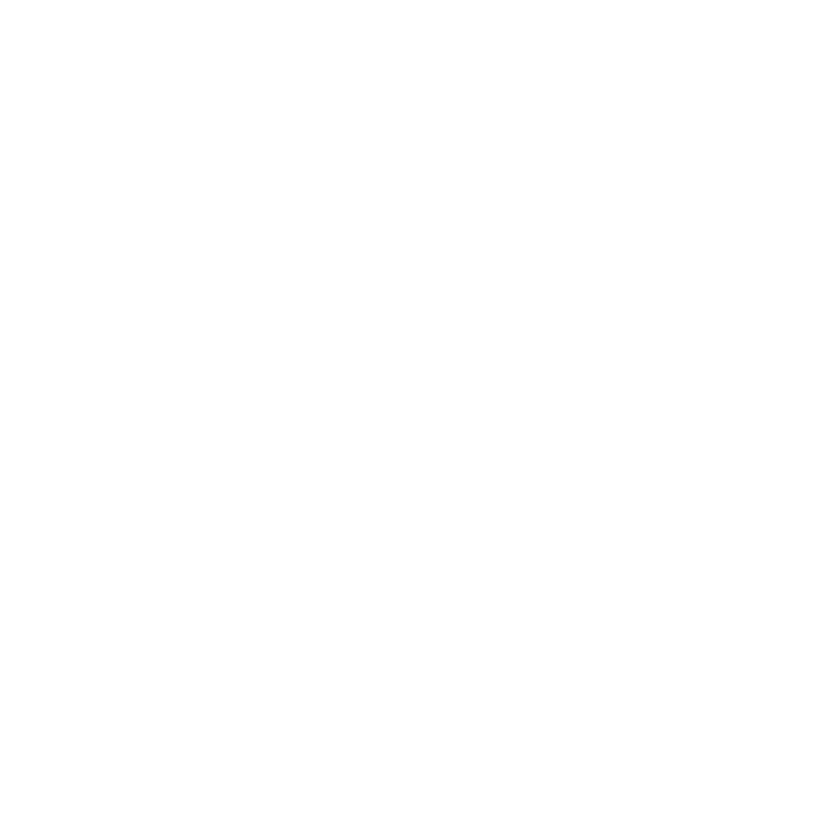

In [138]:
intergenic = nrow(df_all[df_all$type=="intergenic",])
in_genes = nrow(df_all[df_all$type!="intergenic",])
intergenic_pct = round((intergenic/nrow(df_all))*100)
genic_pct = round((in_genes/nrow(df_all))*100)
pie(c(intergenic, in_genes), labels = paste(c("intergenic","genic"),c(intergenic_pct,genic_pct),c("%","%")), 
    main="Region types", cex=2)



In [828]:
df_tcga_ol = df_all %>% filter(Gene!="intergenic") %>% group_by(gene2) %>% 
summarize(bp.tcga.overlap=sum(bp.tcga.overlap))
head(df_tcga_ol,20)

gene2,bp.tcga.overlap
<chr>,<int>
1-Dec,0
5_8S_rRNA,0
5S_rRNA,0
6-Sep,0
9-Sep,0
A1BG,0
A1BG-AS1,0
A1CF,0
A2M,0


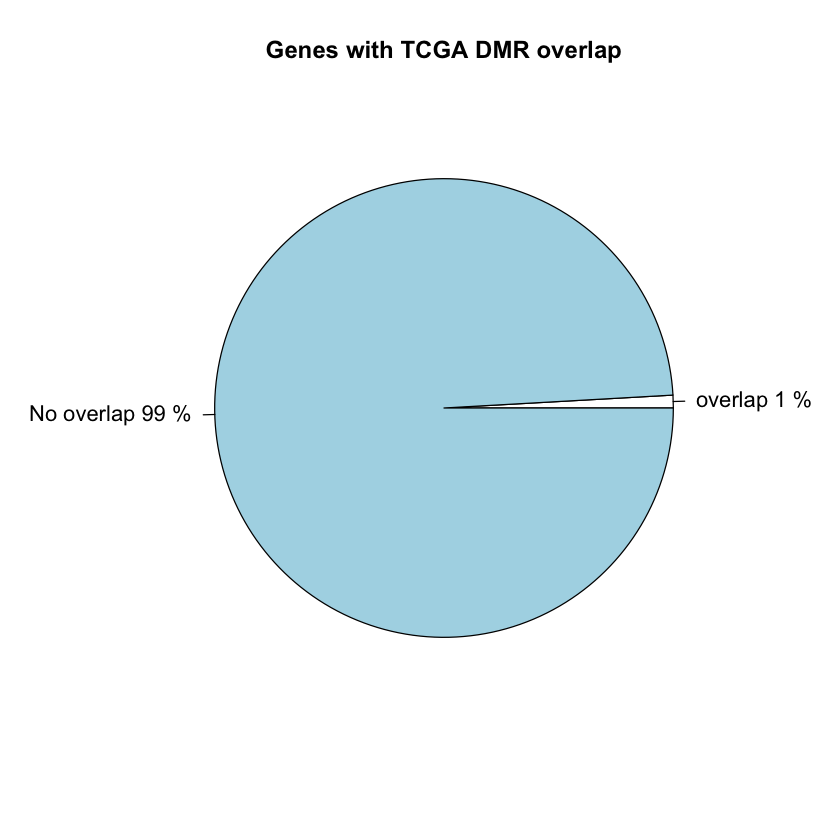

In [829]:
w_overlap = nrow(df_tcga_ol[df_tcga_ol$bp.tcga.overlap > 0,])
w_overlap_pct = round(nrow(df_tcga_ol[df_tcga_ol$bp.tcga.overlap > 0,])/nrow(df_tcga_ol) * 100)
no_overlap_pct = round(((nrow(df_tcga_ol)-w_overlap)/nrow(df_tcga_ol)*100))

pie(c(w_overlap, nrow(df_tcga_ol)-w_overlap), 
    labels=paste(c("overlap", "No overlap"),c(w_overlap_pct, no_overlap_pct),c("%","%")),
   cex=1.1, main="Genes with TCGA DMR overlap")

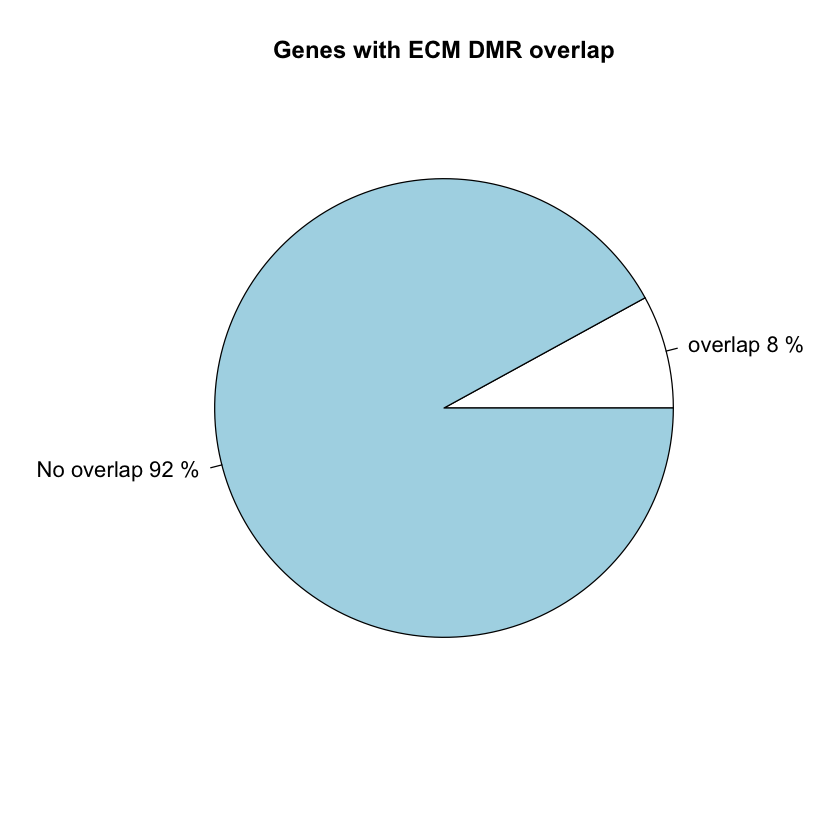

In [830]:
df_ecm_ol = df_all %>% filter(Gene!="intergenic") %>% group_by(gene2) %>% 
summarize(bp.ecm.overlap=sum(bp.ecm.overlap)) 
w_overlap = nrow(df_ecm_ol[df_ecm_ol$bp.ecm.overlap > 0,])
w_overlap_pct = round(nrow(df_ecm_ol[df_ecm_ol$bp.ecm.overlap > 0,])/nrow(df_ecm_ol) * 100)
no_overlap_pct = round(((nrow(df_ecm_ol)-w_overlap)/nrow(df_ecm_ol)*100))

pie(c(w_overlap, nrow(df_ecm_ol)-w_overlap), 
    labels=paste(c("overlap", "No overlap"),c(w_overlap_pct, no_overlap_pct),c("%","%")),
   cex=1.1, main="Genes with ECM DMR overlap")

## Select panel region subsets

In [ ]:
## Select panel regions
# reasons to select a region
# —high number of pubs
# —has a paper with recent functional evidence or review mention and at least one other evidence type from our work
# —extract promoter regions from these genes
# —count number of CpGs in the region
# —filter by overlaps with TCGA DMRs or ECM DMRs


In [175]:
df_all = read.table(file="./marker_collation/all_lit_regions_annotated_overlaps_05202022.tsv", header=TRUE, sep="\t")
head(df_all)

,chr_hg19,start_hg19,end_hg19,chr_hg38,start_hg38,end_hg38,pub.strand,source,pub.gene.name,pub.reg.type,⋯,in.gencode.gene,gencode.gene.name,in.gencode.promoter,is.ingergenic,hybrid.gene.name,no.total.pubs,region,bp.tcga.overlap,bp.ecm.overlap,ecm.methyl.status
,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<chr>,<lgl>,<lgl>,<chr>,<int>,<chr>,<int>,<int>,<chr>
1,4,106067032,106200973,chr4,105145875,105279816,+,Kukkonen et al. 2021,TET2,gene,⋯,TRUE,TET2-AS1,TRUE,FALSE,TET2,4,4 : 105145875 - 105279816,373,174,hyper
2,20,31350191,31397165,chr20,32762385,32809359,+,Kukkonen et al. 2021,DNMT3B,gene,⋯,TRUE,DNMT3B,TRUE,FALSE,DNMT3B,2,20 : 32762385 - 32809359,0,806,hyper
3,2,209100953,209130798,chr2,208236229,208266074,-,Kukkonen et al. 2021,IDH1,gene,⋯,TRUE,IDH1-AS1,TRUE,FALSE,IDH1,1,2 : 208236229 - 208266074,0,0,.
4,7,140419127,140624729,chr7,140719327,140924929,-,Kukkonen et al. 2021,BRAF,gene,⋯,TRUE,RNU6-85P,TRUE,FALSE,BRAF,1,7 : 140719327 - 140924929,0,0,.
5,X,66763863,66950461,chrX,67544021,67730619,+,Kukkonen et al. 2021,AR,gene,⋯,TRUE,AR,TRUE,FALSE,AR,2,X : 67544021 - 67730619,0,0,.
6,8,128747680,128755197,chr8,127735434,127742951,+,Kukkonen et al. 2021,MYC,gene,⋯,TRUE,MYC,TRUE,FALSE,MYC,3,8 : 127735434 - 127742951,0,1954,hypo


In [178]:
# pub count was originally on hybrid names, so there should be a unique count per hybrid name
df_pub_count = df_all %>% filter(!(is.ingergenic)) %>% select(hybrid.gene.name,no.total.pubs) %>% distinct()

table(df_pub_count$no.total.pubs)


   1    2    3    4    5    6    7    8   15 
4401 1055  248   70   19    5    3    4    1 

In [180]:
write.table(df_pub_count, file="./marker_collation/gene_pub_count_table.csv", sep=",", row.names=FALSE, col.names=TRUE)

In [304]:
df_pub_count = read.table(file="./marker_collation/gene_pub_count_table.csv", sep=",",header=TRUE)
df_pub_count = df_pub_count[,c(1,2)]
head(df_pub_count)

,hybrid.gene.name,no.total.pubs
,<chr>,<int>
1,TET2,4
2,DNMT3B,2
3,IDH1,1
4,BRAF,1
5,AR,2
6,MYC,3


In [301]:
# look up ensemble ids from hgcn database for each gene name because the pub gene name might not be in the gencode file
# look up promoter region based on ensemble id. 

# GENCODE name = ENSEMBLE name, HUGO agrees with these, but occasionally not
# look up synonyms here: https://www.genenames.org/tools/multi-symbol-checker/


# these are hybrid gene names matched with their approved hugo gene symbols
df_hugo = read.csv(file="./marker_collation/pub_count_table_hgnc-symbol-check2.csv", header=TRUE)
head(df_hugo)

,Input,Match.type,Approved.symbol,Approved.name,HGNC.ID,Location
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,TET2,Approved symbol,TET2,tet methylcytosine dioxygenase 2,HGNC:25941,4q24
2,DNMT3B,Approved symbol,DNMT3B,DNA methyltransferase 3 beta,HGNC:2979,20q11.21
3,IDH1,Approved symbol,IDH1,isocitrate dehydrogenase (NADP(+)) 1,HGNC:5382,2q34
4,BRAF,Approved symbol,BRAF,"B-Raf proto-oncogene, serine/threonine kinase",HGNC:1097,7q34
5,AR,Approved symbol,AR,androgen receptor,HGNC:644,Xq12
6,MYC,Approved symbol,MYC,"MYC proto-oncogene, bHLH transcription factor",HGNC:7553,8q24.21


In [302]:
df_promoters = read.table(file="../Translational_Science/gencode.v40lift37.promoters.bed", header=TRUE, sep="\t")
head(df_promoters)
dim(df_promoters)

,chr,start_hg19,end_hg19,gene_name,strand,dot2,type
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,1,10869,12869,DDX11L1,+,.,promoter
2,1,13404,15404,WASH7P,-,.,promoter
3,1,28554,30554,MIR1302-2HG,+,.,promoter
4,1,33554,35554,FAM138A,-,.,promoter
5,1,51473,53473,OR4G4P,+,.,promoter
6,1,56598,58598,OR4G11P,+,.,promoter


[1] 63331     7

In [305]:
dim(df_pub_count)

# get gene hugo name
df_pub_count2 = df_pub_count %>% inner_join(df_hugo, by=c(hybrid.gene.name="Input"))
dim(df_pub_count2)

# match hugo name with genecode promoter
df_pub_count3 = df_pub_count2 %>% inner_join(df_promoters, by=c(Approved.symbol="gene_name"))
head(df_pub_count3)
dim(df_pub_count3)


[1] 5706    2

[1] 5706    7

,hybrid.gene.name,no.total.pubs,Match.type,Approved.symbol,Approved.name,HGNC.ID,Location,chr,start_hg19,end_hg19,strand,dot2,type
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,TET2,4,Approved symbol,TET2,tet methylcytosine dioxygenase 2,HGNC:25941,4q24,4,106066032,106068032,+,.,promoter
2,DNMT3B,2,Approved symbol,DNMT3B,DNA methyltransferase 3 beta,HGNC:2979,20q11.21,20,31349191,31351191,+,.,promoter
3,IDH1,1,Approved symbol,IDH1,isocitrate dehydrogenase (NADP(+)) 1,HGNC:5382,2q34,2,209099953,209101953,-,.,promoter
4,BRAF,1,Approved symbol,BRAF,"B-Raf proto-oncogene, serine/threonine kinase",HGNC:1097,7q34,7,140418127,140420127,-,.,promoter
5,AR,2,Approved symbol,AR,androgen receptor,HGNC:644,Xq12,X,66762863,66764863,+,.,promoter
6,MYC,3,Approved symbol,MYC,"MYC proto-oncogene, bHLH transcription factor",HGNC:7553,8q24.21,8,128746680,128748680,+,.,promoter


[1] 5724   13

In [307]:
df_pub_count3 = df_pub_count3 %>% mutate(size = end_hg19 - start_hg19)
head(df_pub_count3)

,hybrid.gene.name,no.total.pubs,Match.type,Approved.symbol,Approved.name,HGNC.ID,Location,chr,start_hg19,end_hg19,strand,dot2,type,size
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>
1,TET2,4,Approved symbol,TET2,tet methylcytosine dioxygenase 2,HGNC:25941,4q24,4,106066032,106068032,+,.,promoter,2000
2,DNMT3B,2,Approved symbol,DNMT3B,DNA methyltransferase 3 beta,HGNC:2979,20q11.21,20,31349191,31351191,+,.,promoter,2000
3,IDH1,1,Approved symbol,IDH1,isocitrate dehydrogenase (NADP(+)) 1,HGNC:5382,2q34,2,209099953,209101953,-,.,promoter,2000
4,BRAF,1,Approved symbol,BRAF,"B-Raf proto-oncogene, serine/threonine kinase",HGNC:1097,7q34,7,140418127,140420127,-,.,promoter,2000
5,AR,2,Approved symbol,AR,androgen receptor,HGNC:644,Xq12,X,66762863,66764863,+,.,promoter,2000
6,MYC,3,Approved symbol,MYC,"MYC proto-oncogene, bHLH transcription factor",HGNC:7553,8q24.21,8,128746680,128748680,+,.,promoter,2000


In [308]:
write.table(df_pub_count3, file="./marker_collation/gene_pub_count_table.csv",sep=",",row.names=FALSE, col.names=TRUE)

In [309]:
counts = table(df_pub_count3$no.total.pubs)
counts


   1    2    3    4    5    6    7    8   15 
4318 1057  247   70   19    5    3    4    1 

In [310]:
sum(is.na(df_pub_count3$Approved.symbol))

[1] 0

In [311]:
panel_size <- function(no.pubs){
    return(sum(df_pub_count3$size[df_pub_count3$no.total.pubs >= no.pubs]))
}

sizes = vector()
for (s in names(counts)){
    print(as.numeric(s))
    sizes = c(sizes, panel_size(as.numeric(s)))
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 15


[1] 11448000  2812000   698000   204000    64000    26000    16000    10000
[9]     2000

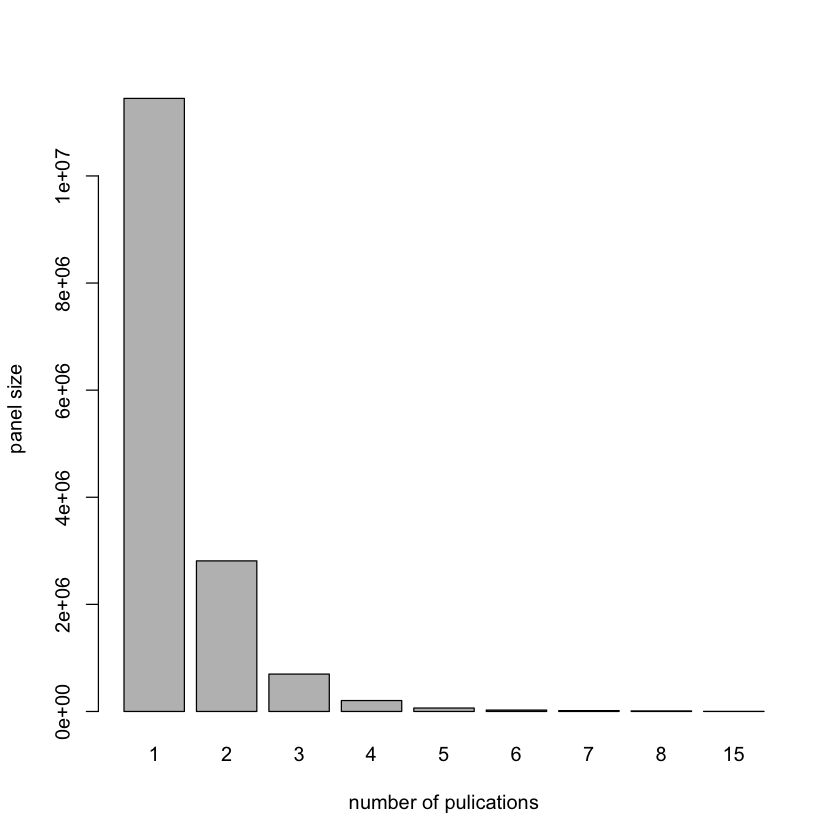

In [312]:
sizes
barplot(sizes, names.arg=names(counts), xlab="number of pulications", ylab="panel size")

In [409]:
# genes to add to whitelist
# note I manually looked up gene synonyms for a few of these that werent matching
df_white = read.table(file="./marker_collation/whitelist_hgnc-symbol-check.csv",header=TRUE, sep=",")
head(df_white)


,Input,Match.type,Approved.symbol,Approved.name,HGNC.ID,Location
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,CD24,Approved symbol,CD24,CD24 molecule,HGNC:1645,6q21
2,TET2,Approved symbol,TET2,tet methylcytosine dioxygenase 2,HGNC:25941,4q24
3,DNMT3B,Approved symbol,DNMT3B,DNA methyltransferase 3 beta,HGNC:2979,20q11.21
4,IDH1,Approved symbol,IDH1,isocitrate dehydrogenase (NADP(+)) 1,HGNC:5382,2q34
5,BRAF,Approved symbol,BRAF,"B-Raf proto-oncogene, serine/threonine kinase",HGNC:1097,7q34
6,AR,Approved symbol,AR,androgen receptor,HGNC:644,Xq12


In [410]:
df_white = df_white %>% distinct()
head(df_white)

,Input,Match.type,Approved.symbol,Approved.name,HGNC.ID,Location
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,CD24,Approved symbol,CD24,CD24 molecule,HGNC:1645,6q21
2,TET2,Approved symbol,TET2,tet methylcytosine dioxygenase 2,HGNC:25941,4q24
3,DNMT3B,Approved symbol,DNMT3B,DNA methyltransferase 3 beta,HGNC:2979,20q11.21
4,IDH1,Approved symbol,IDH1,isocitrate dehydrogenase (NADP(+)) 1,HGNC:5382,2q34
5,BRAF,Approved symbol,BRAF,"B-Raf proto-oncogene, serine/threonine kinase",HGNC:1097,7q34
6,AR,Approved symbol,AR,androgen receptor,HGNC:644,Xq12


In [412]:
df_white = df_white %>% select("Approved.symbol") %>% inner_join(df_pub_count3, by="Approved.symbol")
head(df_white)

,Approved.symbol,hybrid.gene.name,no.total.pubs,Match.type,Approved.name,HGNC.ID,Location,chr,start_hg19,end_hg19,strand,dot2,type,size
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>
1,TET2,TET2,4,Approved symbol,tet methylcytosine dioxygenase 2,HGNC:25941,4q24,4,106066032,106068032,+,.,promoter,2000
2,DNMT3B,DNMT3B,2,Approved symbol,DNA methyltransferase 3 beta,HGNC:2979,20q11.21,20,31349191,31351191,+,.,promoter,2000
3,IDH1,IDH1,1,Approved symbol,isocitrate dehydrogenase (NADP(+)) 1,HGNC:5382,2q34,2,209099953,209101953,-,.,promoter,2000
4,BRAF,BRAF,1,Approved symbol,"B-Raf proto-oncogene, serine/threonine kinase",HGNC:1097,7q34,7,140418127,140420127,-,.,promoter,2000
5,AR,AR,2,Approved symbol,androgen receptor,HGNC:644,Xq12,X,66762863,66764863,+,.,promoter,2000
6,MYC,MYC,3,Approved symbol,"MYC proto-oncogene, bHLH transcription factor",HGNC:7553,8q24.21,8,128746680,128748680,+,.,promoter,2000


In [413]:
df_panel = rbind(df_pub_count3, df_white) %>% distinct() %>% arrange(chr, start_hg19, end_hg19)
df_panel$is.whitelist = df_panel$Approved.symbol %in% df_white$Approved.symbol

In [414]:
df_out = df_panel %>% select(-c("dot2","Match.type")) %>% rename(hugo_gene_name="Approved.symbol") %>%
select(chr, start_hg19, end_hg19, everything())
write.table(df_out, file="./marker_collation/Prostate_lit_regions_annotated_05252022.tsv",
           row.names=FALSE, col.names=TRUE, quote=FALSE, sep="\t")

In [359]:
# calc overlaps with TCGA and ECM
# bedtools intersect -a Prostate_lit_regions_annotated_05252022.tsv -b ../PRAD_450k_DMR.deepFilter_0.33_0.67_minProbes3_fmt.bed -wao > lit_promoters_tcga_overlap.out
# bedtools intersect -a Prostate_lit_regions_annotated_05252022.tsv -b ../ECM_DMRs_raw_Hang_05172022_sorted.bed -wao > lit_promoters_ecm_overlap.out

In [418]:
df_tcga_ol = read.csv(file="./marker_collation/lit_promoters_tcga_overlap.out", sep="\t", header=FALSE)
# head(df_tcga_ol)
df_tcga_ol = df_tcga_ol %>% select(V1,V2,V3,V17) %>% group_by(V1,V2,V3) %>% summarize(bp.tcga.overlap=sum(V17, na.rm=TRUE)) 
nrow(df_tcga_ol)

`summarise()` has grouped output by 'V1', 'V2'. You can override using the `.groups` argument.


[1] 5708

In [419]:
df_ecm_ol = read.csv(file="./marker_collation/lit_promoters_ecm_overlap.out", sep="\t", header=FALSE)
df_ecm_ol = df_ecm_ol %>% select(V1,V2,V3,V34) %>% group_by(V1,V2,V3) %>% summarize(bp.ecm.overlap=sum(V34, na.rm=TRUE)) 
nrow(df_ecm_ol)

`summarise()` has grouped output by 'V1', 'V2'. You can override using the `.groups` argument.


[1] 5708

In [420]:
df_out = df_out %>% left_join(df_tcga_ol, by=c(chr="V1",start_hg19="V2",end_hg19="V3"))
df_out = df_out %>% left_join(df_ecm_ol, by=c(chr="V1",start_hg19="V2",end_hg19="V3"))
head(df_out)

,chr,start_hg19,end_hg19,hybrid.gene.name,no.total.pubs,hugo_gene_name,Approved.name,HGNC.ID,Location,strand,type,size,is.whitelist,bp.tcga.overlap,bp.ecm.overlap
,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<lgl>,<int>,<int>
1,1,751751,753751,FAM87B,1,FAM87B,family with sequence similarity 87 member B,HGNC:32236,1p36.33,+,promoter,2000,FALSE,0,0
2,1,878583,880583,NOC2L,1,NOC2L,NOC2 like nucleolar associated transcriptional repressor,HGNC:24517,1p36.33,-,promoter,2000,FALSE,0,0
3,1,935518,937518,ISG15,1,ISG15,ISG15 ubiquitin like modifier,HGNC:4053,1p36.33,+,promoter,2000,FALSE,0,0
4,1,1108260,1110260,TTLL10,2,TTLL10,tubulin tyrosine ligase like 10,HGNC:26693,1p36.33,+,promoter,2000,FALSE,0,0
5,1,1269656,1271656,DVL1,1,DVL1,dishevelled segment polarity protein 1,HGNC:3084,1p36.33,-,promoter,2000,FALSE,0,0
6,1,1308110,1310110,AURKAIP1,1,AURKAIP1,aurora kinase A interacting protein 1,HGNC:24114,1p36.33,-,promoter,2000,FALSE,0,0


In [423]:
write.table(df_out, file="./marker_collation/Prostate_lit_regions_annotated_05272022.tsv", sep="\t",
           row.names=FALSE, col.names=TRUE, quote=FALSE)

In [422]:
df_out[df_out$hugo_gene_name=="GSTP1",]

,chr,start_hg19,end_hg19,hybrid.gene.name,no.total.pubs,hugo_gene_name,Approved.name,HGNC.ID,Location,strand,type,size,is.whitelist,bp.tcga.overlap,bp.ecm.overlap
,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<lgl>,<int>,<int>
1061,11,67350213,67352213,GSTP1,15,GSTP1,glutathione S-transferase pi 1,HGNC:4638,11q13.2,+,promoter,2000,TRUE,1065,695


In [398]:
df = read.csv("./marker_collation/Prostate_lit_regions_annotated_05252022.tsv", sep="\t", header=TRUE)
head(df)

,chr,start_hg19,end_hg19,hybrid.gene.name,no.total.pubs,hugo_gene_name,Approved.name,HGNC.ID,Location,strand,type,size,is.whitelist,bp.tcga.overlap,bp.ecm.overlap
,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<lgl>,<int>,<int>
1,1,751751,753751,FAM87B,1,FAM87B,family with sequence similarity 87 member B,HGNC:32236,1p36.33,+,promoter,2000,FALSE,0,0
2,1,878583,880583,NOC2L,1,NOC2L,NOC2 like nucleolar associated transcriptional repressor,HGNC:24517,1p36.33,-,promoter,2000,FALSE,0,0
3,1,935518,937518,ISG15,1,ISG15,ISG15 ubiquitin like modifier,HGNC:4053,1p36.33,+,promoter,2000,FALSE,0,0
4,1,1108260,1110260,TTLL10,2,TTLL10,tubulin tyrosine ligase like 10,HGNC:26693,1p36.33,+,promoter,2000,FALSE,0,0
5,1,1269656,1271656,DVL1,1,DVL1,dishevelled segment polarity protein 1,HGNC:3084,1p36.33,-,promoter,2000,FALSE,0,0
6,1,1308110,1310110,AURKAIP1,1,AURKAIP1,aurora kinase A interacting protein 1,HGNC:24114,1p36.33,-,promoter,2000,FALSE,0,0


In [399]:
sum(df$bp.tcga.overlap>0)


[1] 154

In [400]:
sum(df$bp.ecm.overlap>0)

[1] 558

In [401]:
nrow(df)

[1] 5708

# reattach publication annotations

In [2]:
df_regions = read.csv("./marker_collation/all_lit_regions_wcoords_annot_as_hg19.tsv", 
                     header=TRUE, sep="\t")
head(df_regions)

,chr_hg19,start_hg19,end_hg19,chr_hg38,start_hg38,end_hg38,pub.strand,source,pub.gene.name,pub.reg.type,probe,notes,no.pubs,in.gencode.gene,gencode.gene.name,in.gencode.promoter,is.ingergenic,hybrid.gene.name,no.total.pubs,region
,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<lgl>,<chr>,<lgl>,<lgl>,<chr>,<int>,<chr>
1,4,106067032,106200973,chr4,105145875,105279816,+,Kukkonen et al. 2021,TET2,gene,NA,hypermethylated subtype,1,TRUE,TET2-AS1,TRUE,FALSE,TET2,4,4 : 105145875 - 105279816
2,20,31350191,31397165,chr20,32762385,32809359,+,Kukkonen et al. 2021,DNMT3B,gene,NA,hypermethylated subtype,1,TRUE,DNMT3B,TRUE,FALSE,DNMT3B,2,20 : 32762385 - 32809359
3,2,209100953,209130798,chr2,208236229,208266074,-,Kukkonen et al. 2021,IDH1,gene,NA,hypermethylated subtype,1,TRUE,IDH1-AS1,TRUE,FALSE,IDH1,1,2 : 208236229 - 208266074
4,7,140419127,140624729,chr7,140719327,140924929,-,Kukkonen et al. 2021,BRAF,gene,NA,hypermethylated subtype,1,TRUE,RNU6-85P,TRUE,FALSE,BRAF,1,7 : 140719327 - 140924929
5,X,66763863,66950461,chrX,67544021,67730619,+,Kukkonen et al. 2021,AR,gene,NA,hypermethylated intergenic regions,1,TRUE,AR,TRUE,FALSE,AR,2,X : 67544021 - 67730619
6,8,128747680,128755197,chr8,127735434,127742951,+,Kukkonen et al. 2021,MYC,gene,NA,hypermethylated intergenic regions,1,TRUE,MYC,TRUE,FALSE,MYC,3,8 : 127735434 - 127742951


In [16]:
nrow(df_regions)
pubs_key = df_regions %>% group_by(hybrid.gene.name) %>% summarize(sources=paste(unique(source), collapse=";"))
nrow(pubs_key)
pubs_key %>% filter(hybrid.gene.name=="GSTP1")

[1] 120417

[1] 5944

hybrid.gene.name,sources
<chr>,<chr>
GSTP1,Constancio et al. 2019;Massie et al. 2017;Ylitalo et al 2021;Sugiura et al 2021


In [17]:
df_regions_outfile = read.csv("./marker_collation/Prostate_lit_regions_annotated_05272022.tsv",
                             header=TRUE, sep="\t")

head(df_regions_outfile)

,chr,start_hg19,end_hg19,hybrid.gene.name,no.total.pubs,hugo_gene_name,Approved.name,HGNC.ID,Location,strand,type,size,is.whitelist,bp.tcga.overlap,bp.ecm.overlap
,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<lgl>,<int>,<int>
1,1,751751,753751,FAM87B,1,FAM87B,family with sequence similarity 87 member B,HGNC:32236,1p36.33,+,promoter,2000,FALSE,0,0
2,1,878583,880583,NOC2L,1,NOC2L,NOC2 like nucleolar associated transcriptional repressor,HGNC:24517,1p36.33,-,promoter,2000,FALSE,0,0
3,1,935518,937518,ISG15,1,ISG15,ISG15 ubiquitin like modifier,HGNC:4053,1p36.33,+,promoter,2000,FALSE,0,0
4,1,1108260,1110260,TTLL10,2,TTLL10,tubulin tyrosine ligase like 10,HGNC:26693,1p36.33,+,promoter,2000,FALSE,0,0
5,1,1269656,1271656,DVL1,1,DVL1,dishevelled segment polarity protein 1,HGNC:3084,1p36.33,-,promoter,2000,FALSE,0,0
6,1,1308110,1310110,AURKAIP1,1,AURKAIP1,aurora kinase A interacting protein 1,HGNC:24114,1p36.33,-,promoter,2000,FALSE,0,0


In [19]:
df_updated_outfile = df_regions_outfile %>% 
    left_join(pubs_key %>% select(hybrid.gene.name, sources), by="hybrid.gene.name")
nrow(df_updated_outfile)
sum(is.na(df_updated_outfile$sources))

[1] 5708

[1] 0

In [20]:
df_updated_outfile %>% filter(hybrid.gene.name=="GSTP1")

chr,start_hg19,end_hg19,hybrid.gene.name,no.total.pubs,hugo_gene_name,Approved.name,HGNC.ID,Location,strand,type,size,is.whitelist,bp.tcga.overlap,bp.ecm.overlap,sources
<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<lgl>,<int>,<int>,<chr>
11,67350213,67352213,GSTP1,15,GSTP1,glutathione S-transferase pi 1,HGNC:4638,11q13.2,+,promoter,2000,TRUE,1065,695,Constancio et al. 2019;Massie et al. 2017;Ylitalo et al 2021;Sugiura et al 2021


In [24]:
write.table(df_updated_outfile, "./marker_collation/Prostate_lit_regions_annotated_08022022.tsv",
         row.names=FALSE, sep="\t")

In [3]:
# attach DOIs/PMIDs
df_outfile = read.csv("./marker_collation/Prostate_lit_regions_annotated_08022022.tsv",sep="\t")
head(df_outfile)
df_DOIs = read.xlsx("./prostate_key_to PMIDS.xlsx",
                   sheet="Sheet1")
head(df_DOIs)

,chr,start_hg19,end_hg19,hybrid.gene.name,no.total.pubs,hugo_gene_name,Approved.name,HGNC.ID,Location,strand,type,size,is.whitelist,bp.tcga.overlap,bp.ecm.overlap,sources
,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<lgl>,<int>,<int>,<chr>
1,1,751751,753751,FAM87B,1,FAM87B,family with sequence similarity 87 member B,HGNC:32236,1p36.33,+,promoter,2000,FALSE,0,0,Ylitalo et al 2021
2,1,878583,880583,NOC2L,1,NOC2L,NOC2 like nucleolar associated transcriptional repressor,HGNC:24517,1p36.33,-,promoter,2000,FALSE,0,0,Massie et al. 2017
3,1,935518,937518,ISG15,1,ISG15,ISG15 ubiquitin like modifier,HGNC:4053,1p36.33,+,promoter,2000,FALSE,0,0,Massie et al. 2017
4,1,1108260,1110260,TTLL10,2,TTLL10,tubulin tyrosine ligase like 10,HGNC:26693,1p36.33,+,promoter,2000,FALSE,0,0,Massie et al. 2017
5,1,1269656,1271656,DVL1,1,DVL1,dishevelled segment polarity protein 1,HGNC:3084,1p36.33,-,promoter,2000,FALSE,0,0,Massie et al. 2017
6,1,1308110,1310110,AURKAIP1,1,AURKAIP1,aurora kinase A interacting protein 1,HGNC:24114,1p36.33,-,promoter,2000,FALSE,0,0,Massie et al. 2017


,First.Author.Name,YEAR,DOI,DOI.short,PMID,PMCID,X7
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Aryee,2013,https://doi.org/10.1038/s41467-021-21867-0,10.1038/s41467-021-21867-0,33741908,PMC7979745,NA
2,Constancio,2019,https://doi.org/10.1080/14737159.2019.1604224,10.1080/14737159.2019.1604224,30961397,NA,NA
3,Massie,2017,https://doi.org/10.1016/j.jsbmb.2016.04.009,10.1016/j.jsbmb.2016.04.009,27117390,NA,NA
4,Beltran,2020,https://doi.org/10.1172/JCI131041,10.1172/JCI131041,32091413,PMC7108892,NA
5,Borno,2012,https://doi.org/10.1158/2159-8290.CD-12-0041,10.1158/2159-8290.CD-12-0041,22930729,NA,NA
6,Cai,2021,https://doi.org/10.2147/PGPM.S312024,10.2147/PGPM.S312024,34285549,PMC8285280,NA


In [4]:
df_outfile$first.author = str_split(df_outfile$sources, " ")

i = 0
doi_vec = list()
pmids_vec = list()
for (sources in df_outfile$sources){
    #print(sources)
    i = i + 1
    dois = list()
    pmids = list()
    sources = gsub(";"," ",sources)
    authors = strsplit(sources," ")
    for (auth in authors[[1]]){
        #print(auth)
        if (auth %in% df_DOIs$First.Author.Name){
            dois = append(dois, df_DOIs[df_DOIs$First.Author.Name==auth,"DOI"])
            pmids = append(pmids, df_DOIs[df_DOIs$First.Author.Name==auth,"PMID"])
            }
        }
    doi_vec[[i]] <- paste(shQuote(dois), collapse=", ")
    #print(length(doi_vec))
    pmids_vec[[i]] <- paste(shQuote(pmids[!is.na(pmids)]), collapse=", ")
    }
stopifnot(length(doi_vec)==nrow(df_outfile))  #theres no check for authors missing in the sheet TODO

In [5]:
df_outfile$DOIs = doi_vec
df_outfile$PMIDs = pmids_vec
df_outfile[df_outfile$hybrid.gene.name=="GSTP1",]
head(df_outfile)

,chr,start_hg19,end_hg19,hybrid.gene.name,no.total.pubs,hugo_gene_name,Approved.name,HGNC.ID,Location,strand,type,size,is.whitelist,bp.tcga.overlap,bp.ecm.overlap,sources,first.author,DOIs,PMIDs
,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<lgl>,<int>,<int>,<chr>,<list>,<list>,<list>
1061,11,67350213,67352213,GSTP1,15,GSTP1,glutathione S-transferase pi 1,HGNC:4638,11q13.2,+,promoter,2000,TRUE,1065,695,Constancio et al. 2019;Massie et al. 2017;Ylitalo et al 2021;Sugiura et al 2021,"Constancio , et , al. , 2019;Massie , et , al. , 2017;Ylitalo, et , al , 2021;Sugiura, et , al , 2021","'https://doi.org/10.1080/14737159.2019.1604224', 'https://doi.org/10.1016/j.jsbmb.2016.04.009', 'https://doi.org/10.1186/s13148-021-01119-0', 'https://doi.org/10.1111/iju.14406'","'30961397', '27117390', '34193246', '33111429'"


,chr,start_hg19,end_hg19,hybrid.gene.name,no.total.pubs,hugo_gene_name,Approved.name,HGNC.ID,Location,strand,type,size,is.whitelist,bp.tcga.overlap,bp.ecm.overlap,sources,first.author,DOIs,PMIDs
,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<lgl>,<int>,<int>,<chr>,<list>,<list>,<list>
1,1,751751,753751,FAM87B,1,FAM87B,family with sequence similarity 87 member B,HGNC:32236,1p36.33,+,promoter,2000,FALSE,0,0,Ylitalo et al 2021,"Ylitalo, et , al , 2021",'https://doi.org/10.1186/s13148-021-01119-0','34193246'
2,1,878583,880583,NOC2L,1,NOC2L,NOC2 like nucleolar associated transcriptional repressor,HGNC:24517,1p36.33,-,promoter,2000,FALSE,0,0,Massie et al. 2017,"Massie, et , al. , 2017",'https://doi.org/10.1016/j.jsbmb.2016.04.009','27117390'
3,1,935518,937518,ISG15,1,ISG15,ISG15 ubiquitin like modifier,HGNC:4053,1p36.33,+,promoter,2000,FALSE,0,0,Massie et al. 2017,"Massie, et , al. , 2017",'https://doi.org/10.1016/j.jsbmb.2016.04.009','27117390'
4,1,1108260,1110260,TTLL10,2,TTLL10,tubulin tyrosine ligase like 10,HGNC:26693,1p36.33,+,promoter,2000,FALSE,0,0,Massie et al. 2017,"Massie, et , al. , 2017",'https://doi.org/10.1016/j.jsbmb.2016.04.009','27117390'
5,1,1269656,1271656,DVL1,1,DVL1,dishevelled segment polarity protein 1,HGNC:3084,1p36.33,-,promoter,2000,FALSE,0,0,Massie et al. 2017,"Massie, et , al. , 2017",'https://doi.org/10.1016/j.jsbmb.2016.04.009','27117390'
6,1,1308110,1310110,AURKAIP1,1,AURKAIP1,aurora kinase A interacting protein 1,HGNC:24114,1p36.33,-,promoter,2000,FALSE,0,0,Massie et al. 2017,"Massie, et , al. , 2017",'https://doi.org/10.1016/j.jsbmb.2016.04.009','27117390'


In [6]:
df_outfile <- apply(df_outfile,2,as.character)

write.table(df_outfile, "./marker_collation/Prostate_lit_regions_annotated_10032022.tsv",
         row.names=FALSE, quote=FALSE, sep="\t")

## Process regions associated with disease progression

In [33]:
df_regions = read.csv("./marker_collation/disease_progression_loci.csv", header=TRUE, sep=',')
head(df_regions)

,gene,probe,hg18.location,hg19.location,source,association
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GSTP1,,,,Constancio et al. 2019,"staging, survival, recurrence"
2,CDH17,,,,Constancio et al. 2019,"staging, survival, recurrence"
3,PCDH10,,,,Constancio et al. 2019,"staging, survival, recurrence"
4,PCDH8,,,,Constancio et al. 2019,"staging, survival, recurrence"
5,RARB,,,,Constancio et al. 2019,"staging, survival, recurrence"
6,MEG3,,,,Cai et al. 2021,"hypomethylation, assoc. with recurrence free survival"


In [34]:
# this file has some weird formatting 
# grep cg humanmethylation450_15017482_v1-2.csv > humanmethylation450_15017482_v1-2_cg.csv   
#  tail -n +8 humanmethylation450_15017482_v1-2_cg.csv| cut -d "," -f1,12-13 > humanmethylation450_15017482_v1-2_coords.csv

# look up probe hg19 locations
df_450k = read.table("./../Translational_Science/humanmethylation450_15017482_v1-2_coords.csv", header=FALSE, sep=",")
colnames(df_450k) = c("probe", "hg19_chr", "hg19_pos")

df_probes = df_regions %>% filter(probe!="") %>% left_join(df_450k, by="probe")
nrow(df_probes)
head(df_probes)

[1] 151

,gene,probe,hg18.location,hg19.location,source,association,hg19_chr,hg19_pos
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,C11orf80,cg19932343,,,Panja et al. 2018,"hypomethylated, ADT resistance",11,66610763
2,RCE1,cg19932343,,,Panja et al. 2018,"hypomethylated, ADT resistance",11,66610763
3,CLDN17,cg07201638,,,Panja et al. 2018,"hypermethylated, ADT resistance",21,31538714
4,SLC46A1,cg25014117,,,Panja et al. 2018,"hypomethylated, ADT resistance",17,26733068
5,STMN1,cg23079732,,,Panja et al. 2018,"hypomethylated, ADT resistance",1,26232465
6,NOTCH4,cg08592230,,,Panja et al. 2018,"hypomethylated, ADT resistance",6,32163562


In [58]:
df_probes$hg19_start = df_probes$hg19_pos - 10
df_probes$hg19_end = df_probes$hg19_pos + 10

In [36]:
df_promoters = read.csv("../Translational_Science/gencode.v40lift37.promoters.bed", sep="\t", header=TRUE)
head(df_promoters)

,chr,start_hg19,end_hg19,gene_name,strand,dot2,type
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,1,10869,12869,DDX11L1,+,.,promoter
2,1,13404,15404,WASH7P,-,.,promoter
3,1,28554,30554,MIR1302-2HG,+,.,promoter
4,1,33554,35554,FAM138A,-,.,promoter
5,1,51473,53473,OR4G4P,+,.,promoter
6,1,56598,58598,OR4G11P,+,.,promoter


In [64]:
df_genes = df_regions %>% filter(probe=="", hg18.location=="", hg19.location=="") %>% left_join(df_promoters, by=c("gene"="gene_name"))
df_genes = df_genes %>% rename("hg19_chr"="chr", "hg19_end"="end_hg19", "hg19_start"="start_hg19")
nrow(df_genes)
head(df_genes)

[1] 26

,gene,probe,hg18.location,hg19.location,source,association,hg19_chr,hg19_start,hg19_end,strand,dot2,type
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,GSTP1,,,,Constancio et al. 2019,"staging, survival, recurrence",11,67350213,67352213,+,.,promoter
2,CDH17,,,,Constancio et al. 2019,"staging, survival, recurrence",8,95138390,95140390,-,.,promoter
3,PCDH10,,,,Constancio et al. 2019,"staging, survival, recurrence",4,134069449,134071449,+,.,promoter
4,PCDH8,,,,Constancio et al. 2019,"staging, survival, recurrence",13,53416024,53418024,-,.,promoter
5,RARB,,,,Constancio et al. 2019,"staging, survival, recurrence",3,24728378,24730378,+,.,promoter
6,MEG3,,,,Cai et al. 2021,"hypomethylation, assoc. with recurrence free survival",14,101244747,101246747,+,.,promoter


In [38]:
# lift over hg18 coords for Kron et al. 
failed.hits = read.table("./marker_collation/Kron_disease_prog_hglft_genome_343ef_a4cd40.err.txt", sep="\t", header=FALSE)
head(failed.hits)
conversions = read.table("./marker_collation/Kron_disease_prog_hglft_genome_343ef_a4cd40.bed", sep="\t", header=FALSE)
head(conversions)

,V1
,<chr>
1,chr1:17022023-17022067
2,chr13:111156571-111156615
3,chr13:111290973-111291032
4,chr17:78988130-78988189
5,chr18:77662518-77662577
6,chr20:63278124-63278183


,V1
,<chr>
1,chr1:100540281-100540325
2,chr1:108199715-108199774
3,chr1:1174388-1174447
4,chr1:118984317-118984367
5,chr1:118989514-118989558
6,chr1:118993109-118993153


In [54]:
#remove failed hits but keep in same order
df_kron = df_regions %>% filter(grepl("Kron",source), hg18.location!="") 
nrow(df_kron)
for (loc in failed.hits$V1){
    df_kron = df_kron %>% filter(hg18.location!=loc)
}

# add lift over coords
df_kron$hg19.location <- conversions$V1
nrow(df_kron)
tail(df_kron)

[1] 421

[1] 415

,gene,probe,hg18.location,hg19.location,source,association
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
410,chrX:039752897-039752946,,chrX:39893643-39893692,chrX:40008699-40008748,Kron et al. 2013,hypermethylation assoc w/Gleason
411,BCOR,,chrX:39976744-39976788,chrX:40091800-40091844,Kron et al. 2013,hypermethylation assoc w/Gleason
412,chrX:064544802-064544856,,chrX:65324922-65324976,chrX:65408197-65408251,Kron et al. 2013,hypermethylation assoc w/Gleason
413,OGT,,chrX:71449418-71449477,chrX:71532693-71532752,Kron et al. 2013,hypermethylation assoc w/Gleason
414,chrY:027182977-027183036,,chrY:25036830-25036889,chrY:26627442-26627501,Kron et al. 2013,hypermethylation assoc w/Gleason
415,PPP2R3B,,chrY:322187-322245,chrY:352187-352245,Kron et al. 2013,hypermethylation assoc w/Gleason


In [79]:
df_kron$hg19_chr = sapply(strsplit(df_kron$hg19.location,":|-"), "[",1)
df_kron$hg19_start = sapply(strsplit(df_kron$hg19.location,":|-"), "[",2)
df_kron$hg19_end = sapply(strsplit(df_kron$hg19.location,":|-"), "[",3)

In [78]:
# these are all 2 bp probe locations
df_beltran = df_regions %>% filter(grepl("Beltran", source), hg19.location!="")
df_beltran$hg19_chr = sapply(strsplit(df_beltran$hg19.location,":|-"), "[",1)
df_beltran$hg19_start = sapply(strsplit(df_beltran$hg19.location,":|-"), "[",2)
df_beltran$hg19_end = sapply(strsplit(df_beltran$hg19.location,":|-"), "[",3)

df_beltran$hg19_start = as.numeric(df_beltran$hg19_start) - 10
df_beltran$hg19_end = as.numeric(df_beltran$hg19_start) + 10

In [80]:
df_kron_beltran = rbind(df_kron, df_beltran)
df_kron_beltran$hg19_chr = sapply(strsplit(df_kron_beltran$hg19_chr,"chr"),"[",2)
head(df_kron_beltran)

,gene,probe,hg18.location,hg19.location,source,association,hg19_chr,hg19_start,hg19_end
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GPR88,,chr1:100312869-100312913,chr1:100540281-100540325,Kron et al. 2013,hypermethylation assoc w/Gleason,1,100540281,100540325
2,SLC25A24,,chr1:108001238-108001297,chr1:108199715-108199774,Kron et al. 2013,hypermethylation assoc w/Gleason,1,108199715,108199774
3,TTLL10,,chr1:1164251-1164310,chr1:1174388-1174447,Kron et al. 2013,hypermethylation assoc w/Gleason,1,1174388,1174447
4,TBX15,,chr1:118785840-118785890,chr1:118984317-118984367,Kron et al. 2013,hypomethylation assoc w/Gleason,1,118984317,118984367
5,TBX15,,chr1:118791037-118791081,chr1:118989514-118989558,Kron et al. 2013,hypomethylation assoc w/Gleason,1,118989514,118989558
6,TBX15,,chr1:118794632-118794676,chr1:118993109-118993153,Kron et al. 2013,hypomethylation assoc w/Gleason,1,118993109,118993153


In [81]:
colnames(df_genes)
colnames(df_probes)
colnames(df_kron_beltran)

[1] "gene"          "probe"         "hg18.location" "hg19.location"
 [5] "source"        "association"   "hg19_chr"      "hg19_start"   
 [9] "hg19_end"      "strand"        "dot2"          "type"

[1] "gene"          "probe"         "hg18.location" "hg19.location"
 [5] "source"        "association"   "hg19_chr"      "hg19_pos"     
 [9] "hg19_start"    "hg19_end"

[1] "gene"          "probe"         "hg18.location" "hg19.location"
[5] "source"        "association"   "hg19_chr"      "hg19_start"   
[9] "hg19_end"

In [82]:
cols = c("hg19_chr","hg19_start","hg19_end","gene","probe","source","association")
df_regions2 = rbind(df_genes[,cols],df_probes[,cols],df_kron_beltran[,cols])
nrow(df_regions2)
df_regions2 = df_regions2[complete.cases(df_regions2),]
nrow(df_regions2)
write.table(df_regions2, file="./marker_collation/disease_prog_loci_hg19.bed", col.names=TRUE, sep="\t", row.names=FALSE, quote=FALSE)

[1] 631

[1] 629

In [83]:
# look for overlaps with promoters, tcga, and ecm

# vim disease_prog_loci_hg19.bed  # comment out header
# sort -k1,1 -k2,2 -n disease_prog_loci_hg19.bed >disease_prog_loci_hg19_sorted.bed
# bedtools intersect -a disease_prog_loci_hg19_sorted.bed -b ../../Translational_Science/gencode.v40lift37.promoters.bed -wao > disease_prog_loci_prom_overlap.out
# bedtools intersect -a disease_prog_loci_hg19_sorted.bed -b ../PRAD_450k_DMR.deepFilter_0.33_0.67_minProbes3_fmt.bed -wao > disease_prog_loci_tcga_overlap.out
# bedtools intersect -a disease_prog_loci_hg19_sorted.bed -b ../ECM_DMRs_raw_Hang_05172022_sorted.bed -wao > disease_prog_loci_ecm_overlap.out

hg19_chr,hg19_start,hg19_end,gene,probe,source,association
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


In [94]:
df_prom = read.table("./marker_collation/disease_prog_loci_prom_overlap.out", header=FALSE, sep="\t")

df_tcga = read.table("./marker_collation/disease_prog_loci_tcga_overlap.out", header=FALSE, sep="\t")

df_ecm = read.table("./marker_collation/disease_prog_loci_ecm_overlap.out", header=FALSE, sep="\t")

In [85]:
head(df_prom)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,Y,352187,352245,PPP2R3B,,Kron et al. 2013,hypermethylation assoc w/Gleason,.,-1,-1,.,.,.,.,0
2,X,25003756,25003815,ARX,,Kron et al. 2013,hypermethylation assoc w/Gleason,.,-1,-1,.,.,.,.,0
3,Y,26627442,26627501,chrY:027182977-027183036,,Kron et al. 2013,hypermethylation assoc w/Gleason,.,-1,-1,.,.,.,.,0
4,X,40008699,40008748,chrX:039752897-039752946,,Kron et al. 2013,hypermethylation assoc w/Gleason,.,-1,-1,.,.,.,.,0
5,X,40091800,40091844,BCOR,,Kron et al. 2013,hypermethylation assoc w/Gleason,.,-1,-1,.,.,.,.,0
6,X,65408197,65408251,chrX:064544802-064544856,,Kron et al. 2013,hypermethylation assoc w/Gleason,.,-1,-1,.,.,.,.,0


In [87]:
df_regions2$hg19_start = as.integer(df_regions2$hg19_start)
df_regions2$hg19_end = as.integer(df_regions2$hg19_end)

In [91]:
df_regions3 = df_regions2 %>% left_join(df_prom %>% select(V1,V2,V3,V6,V11,V15), by=c("hg19_chr"="V1",
                                                                                      "hg19_start"="V2",
                                                                                      "hg19_end"="V3",
                                                                                      "source"="V6")) %>%
  rename("promoter_name"="V11","is.promoter"="V15")
df_regions3$is.promoter = ifelse(df_regions3$is.promoter>0,TRUE,FALSE)
head(df_regions3)

,hg19_chr,hg19_start,hg19_end,gene,probe,source,association,promoter_name,is.promoter
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
1,11,67350213,67352213,GSTP1,,Constancio et al. 2019,"staging, survival, recurrence",GSTP1,TRUE
2,8,95138390,95140390,CDH17,,Constancio et al. 2019,"staging, survival, recurrence",CDH17,TRUE
3,4,134069449,134071449,PCDH10,,Constancio et al. 2019,"staging, survival, recurrence",PCDH10,TRUE
4,13,53416024,53418024,PCDH8,,Constancio et al. 2019,"staging, survival, recurrence",PCDH8,TRUE
5,3,24728378,24730378,RARB,,Constancio et al. 2019,"staging, survival, recurrence",RARB,TRUE
6,14,101244747,101246747,MEG3,,Cai et al. 2021,"hypomethylation, assoc. with recurrence free survival",MEG3,TRUE


In [103]:
df_tcga2 = df_tcga %>% group_by(V1,V2,V3,V6) %>% summarize(bp.tcga.overlap=sum(V11))

df_regions4 = df_regions3 %>% left_join(df_tcga2, by=c("hg19_chr"="V1","hg19_start"="V2","hg19_end"="V3","source"="V6"))

head(df_regions4)

`summarise()` has grouped output by 'V1', 'V2', 'V3'. You can override using the `.groups` argument.


,hg19_chr,hg19_start,hg19_end,gene,probe,source,association,promoter_name,is.promoter,bp.tcga.overlap
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>
1,11,67350213,67352213,GSTP1,,Constancio et al. 2019,"staging, survival, recurrence",GSTP1,TRUE,1065
2,8,95138390,95140390,CDH17,,Constancio et al. 2019,"staging, survival, recurrence",CDH17,TRUE,0
3,4,134069449,134071449,PCDH10,,Constancio et al. 2019,"staging, survival, recurrence",PCDH10,TRUE,0
4,13,53416024,53418024,PCDH8,,Constancio et al. 2019,"staging, survival, recurrence",PCDH8,TRUE,0
5,3,24728378,24730378,RARB,,Constancio et al. 2019,"staging, survival, recurrence",RARB,TRUE,0
6,14,101244747,101246747,MEG3,,Cai et al. 2021,"hypomethylation, assoc. with recurrence free survival",MEG3,TRUE,0


In [109]:

df_ecm2 = df_ecm %>% group_by(V1,V2,V3,V6) %>% summarize(bp.ecm.overlap=sum(V28))
#head(df_ecm2)
df_regions5 = df_regions4 %>% left_join(df_ecm2, by=c("hg19_chr"="V1","hg19_start"="V2","hg19_end"="V3","source"="V6"))
head(df_regions5)

`summarise()` has grouped output by 'V1', 'V2', 'V3'. You can override using the `.groups` argument.


,hg19_chr,hg19_start,hg19_end,gene,probe,source,association,promoter_name,is.promoter,bp.tcga.overlap,bp.ecm.overlap
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<int>
1,11,67350213,67352213,GSTP1,,Constancio et al. 2019,"staging, survival, recurrence",GSTP1,TRUE,1065,695
2,8,95138390,95140390,CDH17,,Constancio et al. 2019,"staging, survival, recurrence",CDH17,TRUE,0,0
3,4,134069449,134071449,PCDH10,,Constancio et al. 2019,"staging, survival, recurrence",PCDH10,TRUE,0,0
4,13,53416024,53418024,PCDH8,,Constancio et al. 2019,"staging, survival, recurrence",PCDH8,TRUE,0,0
5,3,24728378,24730378,RARB,,Constancio et al. 2019,"staging, survival, recurrence",RARB,TRUE,0,0
6,14,101244747,101246747,MEG3,,Cai et al. 2021,"hypomethylation, assoc. with recurrence free survival",MEG3,TRUE,0,0


In [113]:
df_regions5$hybrid.gene.name = ifelse(df_regions5$gene=="",df_regions5$promoter_name,df_regions5$gene)

In [117]:
df_pub_count = df_regions5 %>% group_by(hybrid.gene.name) %>% summarize(no.pubs=length(unique(source)))

df_regions6 = df_regions5 %>% left_join(df_pub_count, by="hybrid.gene.name")
df_regions6[!complete.cases(df_regions6),]

hg19_chr,hg19_start,hg19_end,gene,probe,source,association,promoter_name,is.promoter,bp.tcga.overlap,bp.ecm.overlap,hybrid.gene.name,no.pubs
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<int>,<chr>,<int>


In [118]:
table(df_regions6$no.pubs)


  1   2 
674   4 

In [120]:
write.table(df_regions6, file="./marker_collation/PRAD_disease_progression_methyl_loci_annotated_06032022.tsv",
           row.names=FALSE, col.names=TRUE, quote=FALSE)